# Part A — Data preparation

In [2]:
import pandas as pd
df = pd.read_csv('fear_greed_index.csv')
df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [3]:
df.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [4]:
import pandas as pd
df2 = pd.read_csv('historical_data.csv')
df2.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
df2.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [6]:
df = df.drop_duplicates()
df2 = df2.drop_duplicates()

In [7]:
df.shape

(2644, 4)

In [8]:
df2.shape

(211224, 16)

In [9]:
import pandas as pd

# Convert first dataset date column
df['date'] = pd.to_datetime(df['date'])

# Convert second dataset timestamp column
df2['Timestamp IST'] = pd.to_datetime(df2['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Create only date column from timestamp
df2['date'] = df2['Timestamp IST'].dt.date

# Convert df date to date only
df['date'] = df['date'].dt.date

# Merge both datasets
merged_df = pd.merge(df, df2, on='date', how='inner')

In [10]:
merged_df.sample()

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
175436,1744435800,43,Fear,2025-04-12,0x513b8629fe877bb581bf244e326a047b249c4ff1,BTC,84002.0,0.002,168.0,BUY,2025-04-12 18:46:00,6.25995,Open Long,0.0,0xaeb7dc374473e2e68a950421672b1d01de00ef366bd8...,86020675615,True,0.042001,8.440000e+14,1.740000e+12


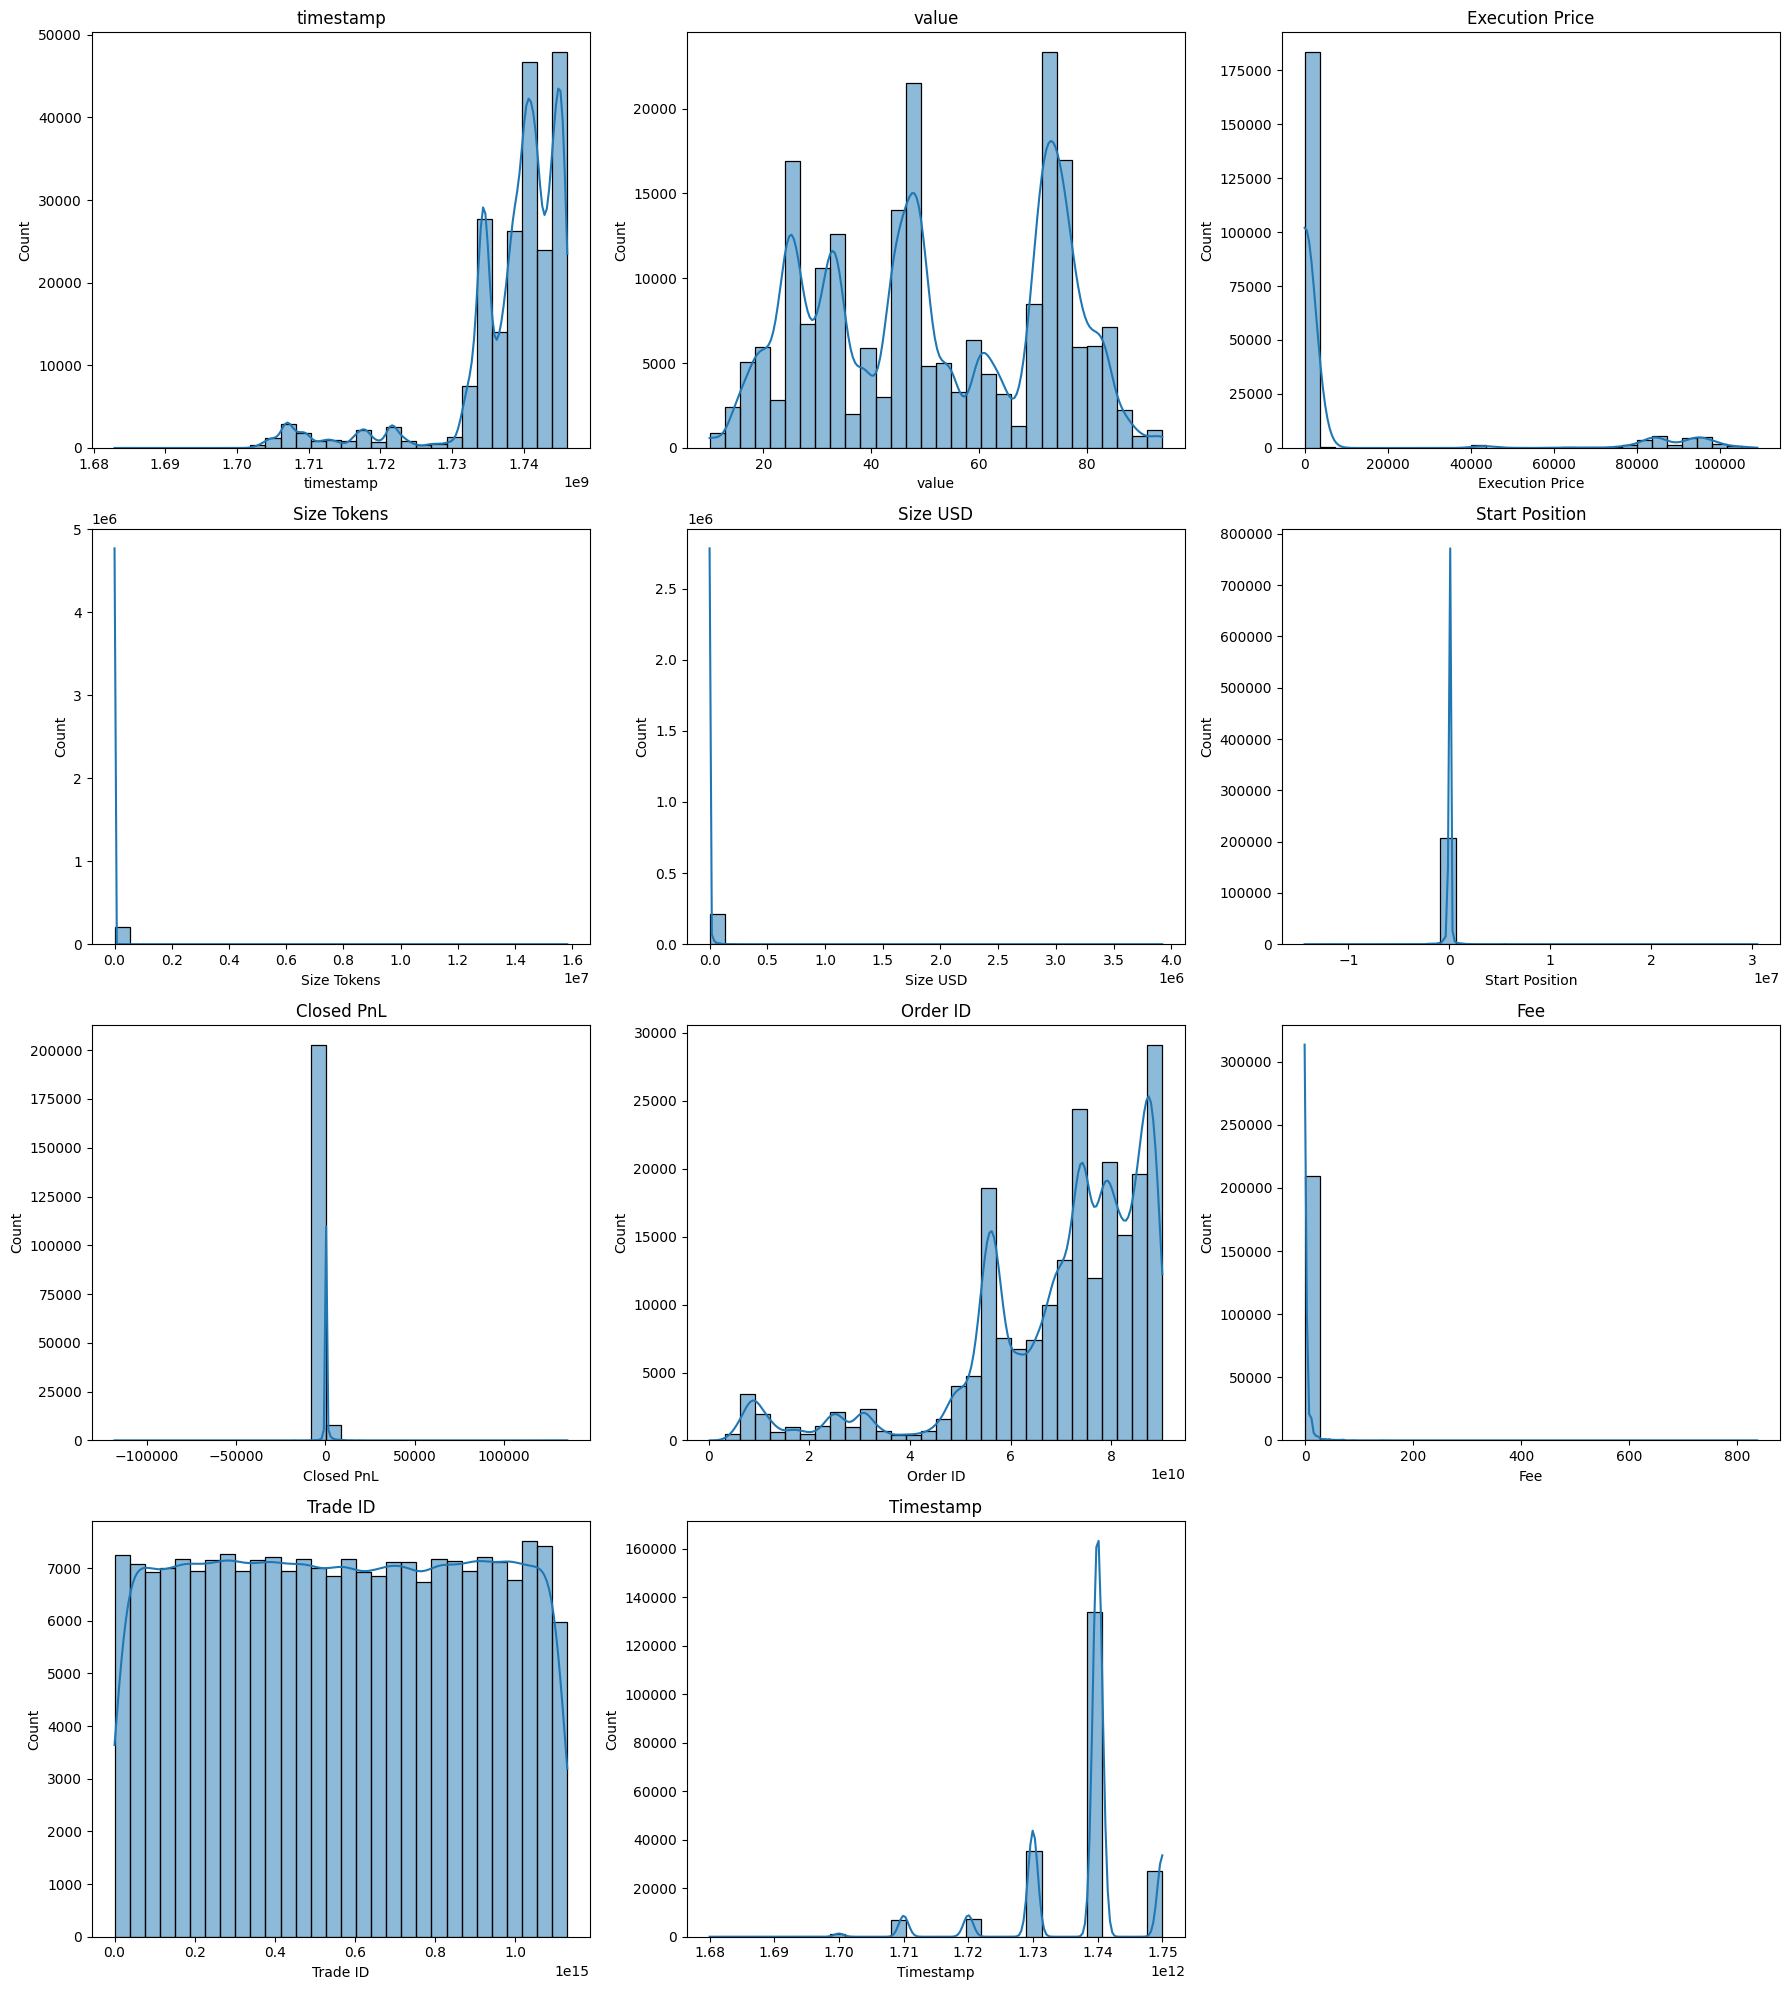

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Select numeric columns
numeric_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Define number of columns in subplot grid
cols = 3
rows = math.ceil(len(numeric_cols) / cols)

# Create figure
fig, axes = plt.subplots(rows, cols, figsize=(18, 5*rows))
axes = axes.flatten()  # Flatten for easy iteration

# Plot each histogram
for i, col in enumerate(numeric_cols):
    sns.histplot(merged_df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'{col}')
    
# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [12]:
print(merged_df.shape)
print(merged_df['classification'].isnull().sum())

(211218, 20)
0


In [13]:
# Daily PnL per Trader
daily_pnl = merged_df.groupby(['Account', 'date'])['Closed PnL'].sum()

In [14]:
# win rate

In [15]:
# Create win column (True if profit, False if loss)
merged_df['is_win'] = merged_df['Closed PnL'] > 0

# Overall win rate
overall_win_rate = merged_df['is_win'].mean()

print("Overall Win Rate:", overall_win_rate)
print("Overall Win Rate (%):", overall_win_rate * 100)

Overall Win Rate: 0.41124809438589516
Overall Win Rate (%): 41.124809438589516


In [16]:
# Average Trade Size
avg_trade_size = merged_df['Size USD'].mean()
print(avg_trade_size)

5639.191610563493


In [17]:
# leverage distribution

In [18]:
print(merged_df.columns)

Index(['timestamp', 'value', 'classification', 'date', 'Account', 'Coin',
       'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'is_win'],
      dtype='object')


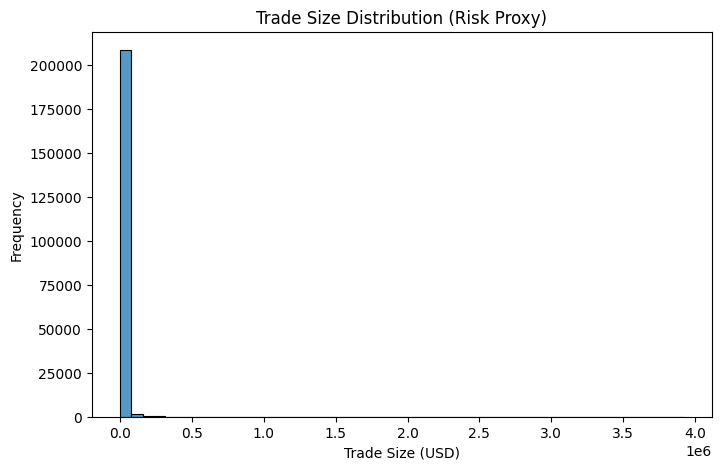

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(merged_df['Size USD'], bins=50)
plt.title("Trade Size Distribution (Risk Proxy)")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Frequency")
plt.show()

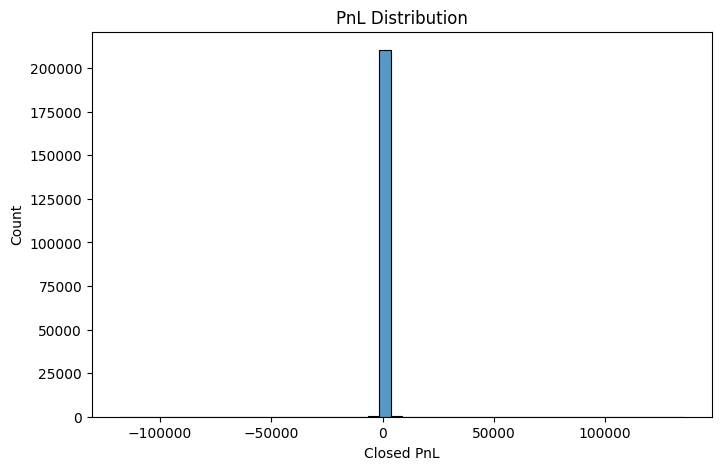

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(merged_df['Closed PnL'], bins=50)
plt.title("PnL Distribution")
plt.show()

In [21]:
merged_df.groupby('classification')['Size USD'].mean()

classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64

In [22]:
# Number of Trades per Day

In [23]:
print(merged_df['date'].head())

0    2023-05-01
1    2023-05-01
2    2023-05-01
3    2023-12-05
4    2023-12-05
Name: date, dtype: object


In [24]:
trades_per_day = (
    merged_df
    .groupby('date')
    .size()
    .reset_index(name='trade_count')
)

print(trades_per_day.head())

         date  trade_count
0  2023-05-01            3
1  2023-12-05            9
2  2023-12-14           11
3  2023-12-15            2
4  2023-12-16            3


In [25]:
# Long/Short Ratio

In [26]:
print(merged_df['Side'].value_counts())

Side
SELL    108528
BUY     102690
Name: count, dtype: int64


In [27]:
side_counts = merged_df['Side'].value_counts()

long_trades = side_counts.get('BUY', 0)
short_trades = side_counts.get('SELL', 0)

long_short_ratio = long_trades / short_trades

print("Long Trades:", long_trades)
print("Short Trades:", short_trades)
print("Long/Short Ratio:", long_short_ratio)

Long Trades: 102690
Short Trades: 108528
Long/Short Ratio: 0.9462074303405573


# Part B — Analysis

In [29]:
# Does performance (PnL, win rate, drawdown proxy) differ between Fear vs Greed days?


In [30]:
fg_df = merged_df[
    merged_df['classification'].isin(['Fear', 'Greed'])
]

In [31]:
pnl_comparison = (
    fg_df
    .groupby('classification')['Closed PnL']
    .mean()
)

print("Average PnL:")
print(pnl_comparison)

Average PnL:
classification
Fear     54.290400
Greed    42.743559
Name: Closed PnL, dtype: float64


In [32]:
fg_df['is_win'] = fg_df['Closed PnL'] > 0

winrate_comparison = (
    fg_df
    .groupby('classification')['is_win']
    .mean()
)

print("\nWin Rate:")
print(winrate_comparison)


Win Rate:
classification
Fear     0.420768
Greed    0.384828
Name: is_win, dtype: float64


/var/folders/_c/bfrh3pms4m58z8m7cf3g56jh0000gn/T/ipykernel_29457/2056176415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg_df['is_win'] = fg_df['Closed PnL'] > 0


In [33]:
avg_loss = (
    fg_df[fg_df['Closed PnL'] < 0]
    .groupby('classification')['Closed PnL']
    .mean()
)

print("\nAverage Loss (Drawdown Proxy):")
print(avg_loss)


Average Loss (Drawdown Proxy):
classification
Fear    -156.662401
Greed   -181.967329
Name: Closed PnL, dtype: float64


In [34]:
volatility = (
    fg_df
    .groupby('classification')['Closed PnL']
    .std()
)

print("\nPnL Volatility:")
print(volatility)


PnL Volatility:
classification
Fear      935.355438
Greed    1116.028390
Name: Closed PnL, dtype: float64


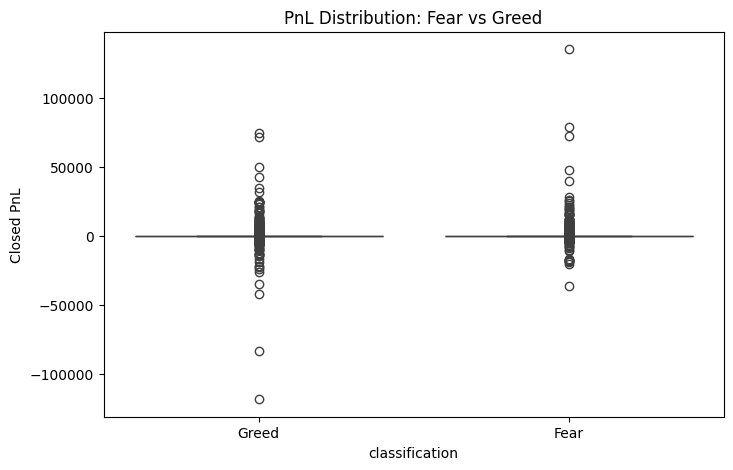

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Closed PnL', data=fg_df)
plt.title("PnL Distribution: Fear vs Greed")
plt.show()

In [36]:
# Yes, performance differs between Fear and Greed days.


In [37]:
# Do traders change behavior based on sentiment (trade frequency, leverage, long/short bias, position sizes)?

In [38]:
trade_freq = (
    merged_df
    .groupby('classification')
    .size()
)

print(trade_freq)

classification
Extreme Fear     21400
Extreme Greed    39992
Fear             61837
Greed            50303
Neutral          37686
dtype: int64


In [39]:
avg_size = (
    merged_df
    .groupby('classification')['Size USD']
    .mean()
)

print(avg_size)

classification
Extreme Fear     5349.731843
Extreme Greed    3112.251565
Fear             7816.109931
Greed            5736.884375
Neutral          4782.732661
Name: Size USD, dtype: float64


In [40]:
long_short = (
    merged_df
    .groupby(['classification', 'Side'])
    .size()
    .unstack(fill_value=0)
)

long_short['Long/Short Ratio'] = (
    long_short['BUY'] / long_short['SELL']
)

print(long_short)

Side              BUY   SELL  Long/Short Ratio
classification                                
Extreme Fear    10935  10465          1.044912
Extreme Greed   17940  22052          0.813532
Fear            30270  31567          0.958913
Greed           24576  25727          0.955261
Neutral         18969  18717          1.013464


In [41]:
risk_proxy = (
    merged_df
    .groupby('classification')['Closed PnL']
    .std()
)

print(risk_proxy)

classification
Extreme Fear     1136.056091
Extreme Greed     766.828294
Fear              935.355438
Greed            1116.028390
Neutral           517.122220
Name: Closed PnL, dtype: float64


In [42]:
# Yes — trader behavior clearly changes with market sentiment, as trade frequency,
# position sizes, directional bias, and performance volatility all vary significantly between Fear and Greed regimes.

In [43]:
# Identify 2–3 segments (examples):
#    high leverage vs low leverage traders
#    frequent vs infrequent traders
#    consistent winners vs inconsistent traders

In [44]:
trade_counts = (
    merged_df
    .groupby('Account')
    .size()
    .reset_index(name='trade_count')
)

# Define threshold (example: median split)
threshold = trade_counts['trade_count'].median()

trade_counts['segment'] = trade_counts['trade_count'].apply(
    lambda x: 'Frequent Trader' if x > threshold else 'Infrequent Trader'
)

print(trade_counts.head())

                                      Account  trade_count            segment
0  0x083384f897ee0f19899168e3b1bec365f52a9012         3818    Frequent Trader
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd         7280    Frequent Trader
2  0x271b280974205ca63b716753467d5a371de622ab         3809    Frequent Trader
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4        13311    Frequent Trader
4  0x2c229d22b100a7beb69122eed721cee9b24011dd         3239  Infrequent Trader


In [45]:
avg_size = (
    merged_df
    .groupby('Account')['Size USD']
    .mean()
    .reset_index(name='avg_trade_size')
)

threshold = avg_size['avg_trade_size'].median()

avg_size['segment'] = avg_size['avg_trade_size'].apply(
    lambda x: 'High Exposure Trader' if x > threshold else 'Low Exposure Trader'
)

print(avg_size.head())

                                      Account  avg_trade_size  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012    16159.576734   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd     1653.226327   
2  0x271b280974205ca63b716753467d5a371de622ab     8893.000898   
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4      507.626933   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd     3138.894782   

                segment  
0  High Exposure Trader  
1   Low Exposure Trader  
2  High Exposure Trader  
3   Low Exposure Trader  
4   Low Exposure Trader  


In [46]:
win_rate = (
    merged_df
    .groupby('Account')['is_win']
    .mean()
    .reset_index(name='win_rate')
)

threshold = win_rate['win_rate'].median()

win_rate['segment'] = win_rate['win_rate'].apply(
    lambda x: 'Consistent Winner' if x > threshold else 'Inconsistent Trader'
)

print(win_rate.head())

                                      Account  win_rate              segment
0  0x083384f897ee0f19899168e3b1bec365f52a9012  0.359612  Inconsistent Trader
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd  0.442720    Consistent Winner
2  0x271b280974205ca63b716753467d5a371de622ab  0.301917  Inconsistent Trader
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4  0.438585    Consistent Winner
4  0x2c229d22b100a7beb69122eed721cee9b24011dd  0.519914    Consistent Winner


# Part B — Analysis

### Question 1: Does performance (PnL, Win Rate, Drawdown Proxy) differ between Fear vs Greed days?

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style="whitegrid", palette="muted")
SENTIMENT_ORDER = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
PALETTE = {'Extreme Fear': '#d62728', 'Fear': '#ff7f0e',
           'Neutral': '#8c8c8c', 'Greed': '#2ca02c', 'Extreme Greed': '#1a7a1a'}

# ── Broad Fear / Greed binary label ────────────────────────────────────────
merged_df['regime'] = merged_df['classification'].apply(
    lambda x: 'Fear' if 'Fear' in x else ('Greed' if 'Greed' in x else 'Neutral')
)

# ── 1A  PnL by sentiment ────────────────────────────────────────────────────
pnl_by_sent = (merged_df.groupby('classification')['Closed PnL']
               .agg(['mean', 'median', 'sum'])
               .reindex(SENTIMENT_ORDER).round(2))
pnl_by_sent.columns = ['Mean PnL', 'Median PnL', 'Total PnL']
print("=== PnL by Sentiment ===")
print(pnl_by_sent)


=== PnL by Sentiment ===
                Mean PnL  Median PnL   Total PnL
classification                                  
Extreme Fear       34.54         0.0   739110.25
Fear               54.29         0.0  3357155.44
Neutral            34.31         0.0  1292920.68
Greed              42.74         0.0  2150129.27
Extreme Greed      67.89         0.0  2715171.31


In [49]:
# ── 1B  Win Rate by sentiment ───────────────────────────────────────────────
winrate_by_sent = (merged_df.groupby('classification')['is_win']
                   .mean().reindex(SENTIMENT_ORDER) * 100).round(2)
print("=== Win Rate (%) by Sentiment ===")
print(winrate_by_sent.to_frame('Win Rate %'))


=== Win Rate (%) by Sentiment ===
                Win Rate %
classification            
Extreme Fear         37.06
Fear                 42.08
Neutral              39.70
Greed                38.48
Extreme Greed        46.49


In [50]:
# ── 1C  Drawdown Proxy = max cumulative loss per day, averaged across accounts ─
# For each account-date, compute rolling min of cumulative PnL as drawdown proxy
daily_trader = (merged_df.sort_values(['Account', 'Timestamp IST'])
                .groupby(['Account', 'date'])['Closed PnL'].sum().reset_index())

# merge sentiment
daily_trader = daily_trader.merge(
    merged_df[['date','classification']].drop_duplicates(), on='date', how='left')

drawdown_proxy = (daily_trader.groupby('classification')['Closed PnL']
                  .apply(lambda s: s[s < 0].mean()).reindex(SENTIMENT_ORDER).round(2))
print("=== Avg Losing Day PnL (Drawdown Proxy) by Sentiment ===")
print(drawdown_proxy.to_frame('Avg Loss on Bad Days'))


=== Avg Losing Day PnL (Drawdown Proxy) by Sentiment ===
                Avg Loss on Bad Days
classification                      
Extreme Fear               -15534.76
Fear                        -6071.37
Neutral                     -6879.44
Greed                      -16562.52
Extreme Greed               -6109.74


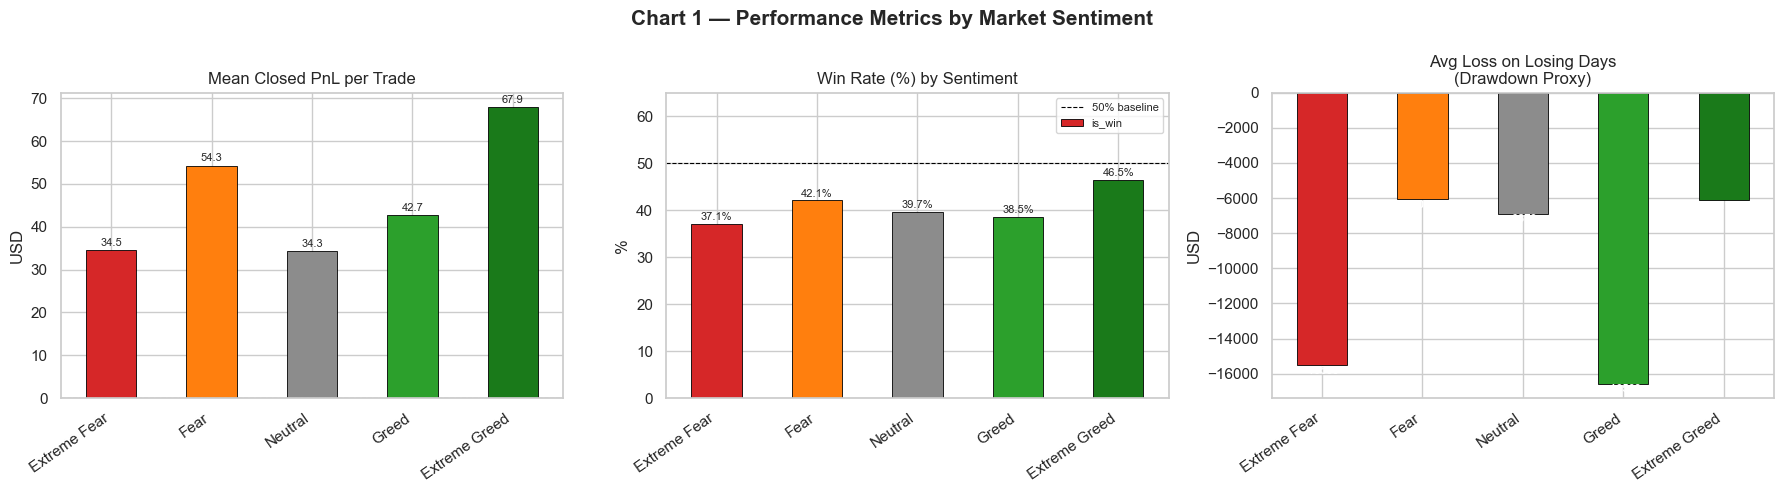

Saved: chart1_performance_by_sentiment.png


In [51]:
# ── CHART 1: PnL + Win Rate by Sentiment ───────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Chart 1 — Performance Metrics by Market Sentiment', fontsize=15, fontweight='bold')

colors = [PALETTE[s] for s in SENTIMENT_ORDER]

# Mean PnL
ax = axes[0]
pnl_by_sent['Mean PnL'].plot(kind='bar', ax=ax, color=colors, edgecolor='black', linewidth=0.6)
ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax.set_title('Mean Closed PnL per Trade')
ax.set_xlabel('')
ax.set_ylabel('USD')
ax.set_xticklabels(SENTIMENT_ORDER, rotation=35, ha='right')
for bar, val in zip(ax.patches, pnl_by_sent['Mean PnL']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{val:.1f}', ha='center', va='bottom', fontsize=8)

# Win Rate
ax = axes[1]
winrate_by_sent.plot(kind='bar', ax=ax, color=colors, edgecolor='black', linewidth=0.6)
ax.axhline(50, color='black', linewidth=0.8, linestyle='--', label='50% baseline')
ax.set_title('Win Rate (%) by Sentiment')
ax.set_xlabel('')
ax.set_ylabel('%')
ax.set_ylim(0, 65)
ax.set_xticklabels(SENTIMENT_ORDER, rotation=35, ha='right')
ax.legend(fontsize=8)
for bar, val in zip(ax.patches, winrate_by_sent):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.4,
            f'{val:.1f}%', ha='center', va='bottom', fontsize=8)

# Drawdown proxy
ax = axes[2]
drawdown_proxy.plot(kind='bar', ax=ax, color=colors, edgecolor='black', linewidth=0.6)
ax.set_title('Avg Loss on Losing Days\n(Drawdown Proxy)')
ax.set_xlabel('')
ax.set_ylabel('USD')
ax.set_xticklabels(SENTIMENT_ORDER, rotation=35, ha='right')
for bar, val in zip(ax.patches, drawdown_proxy):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 30,
            f'{val:.0f}', ha='center', va='top', fontsize=8, color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('chart1_performance_by_sentiment.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: chart1_performance_by_sentiment.png")


### Question 2: Do traders change behavior based on sentiment?

In [53]:
# ── Trade Frequency (normalised by number of days in each sentiment) ─────────
days_per_sent = (merged_df[['date','classification']].drop_duplicates()
                 .groupby('classification').size().reindex(SENTIMENT_ORDER))
raw_freq = merged_df.groupby('classification').size().reindex(SENTIMENT_ORDER)
norm_freq = (raw_freq / days_per_sent).round(1)

# ── Leverage proxy = Size USD / |Start Position| (only where Start Position > 0) ──
merged_df['leverage_proxy'] = np.where(
    merged_df['Start Position'].abs() > 0,
    merged_df['Size USD'] / merged_df['Start Position'].abs(),
    np.nan
)
avg_leverage = (merged_df.groupby('classification')['leverage_proxy']
                .mean().reindex(SENTIMENT_ORDER).round(2))

# ── Long/Short Ratio ─────────────────────────────────────────────────────────
ls = (merged_df.groupby(['classification','Side']).size()
      .unstack(fill_value=0).reindex(SENTIMENT_ORDER))
ls['L/S Ratio'] = (ls['BUY'] / ls['SELL']).round(3)

# ── Avg Position Size ────────────────────────────────────────────────────────
avg_pos = (merged_df.groupby('classification')['Size USD']
           .mean().reindex(SENTIMENT_ORDER).round(2))

behavior_table = pd.DataFrame({
    'Trades/Day (norm)': norm_freq,
    'Avg Leverage Proxy': avg_leverage,
    'L/S Ratio': ls['L/S Ratio'],
    'Avg Position Size USD': avg_pos
})
print("=== Trader Behavior by Sentiment ===")
print(behavior_table)


=== Trader Behavior by Sentiment ===
                Trades/Day (norm)  Avg Leverage Proxy  L/S Ratio  \
classification                                                     
Extreme Fear               1528.6            47926.40      1.045   
Fear                        679.5           443508.82      0.959   
Neutral                     562.5          2321480.35      1.013   
Greed                       260.6           790534.20      0.955   
Extreme Greed               350.8            13241.16      0.814   

                Avg Position Size USD  
classification                         
Extreme Fear                  5349.73  
Fear                          7816.11  
Neutral                       4782.73  
Greed                         5736.88  
Extreme Greed                 3112.25  


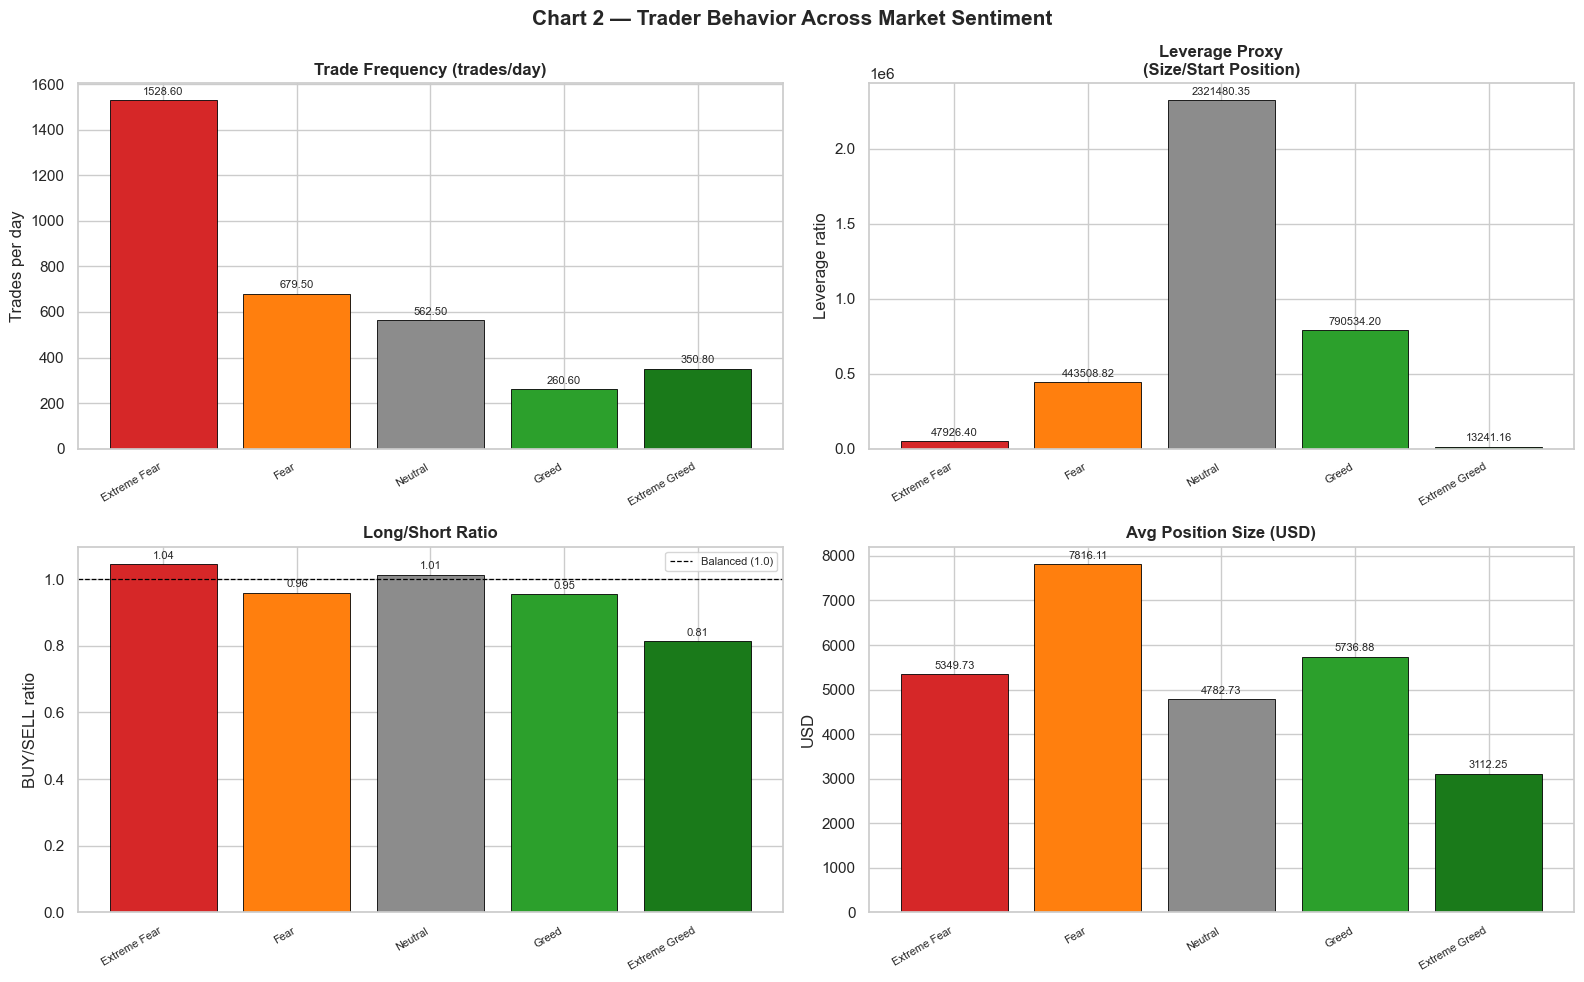

Saved: chart2_behavior_by_sentiment.png


In [54]:
# ── CHART 2: Behavior Changes by Sentiment ──────────────────────────────────
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Chart 2 — Trader Behavior Across Market Sentiment', fontsize=15, fontweight='bold')
axes = axes.flatten()

metrics = ['Trades/Day (norm)', 'Avg Leverage Proxy', 'L/S Ratio', 'Avg Position Size USD']
titles  = ['Trade Frequency (trades/day)', 'Leverage Proxy\n(Size/Start Position)',
           'Long/Short Ratio', 'Avg Position Size (USD)']
ylabs   = ['Trades per day', 'Leverage ratio', 'BUY/SELL ratio', 'USD']

for i, (metric, title, ylab) in enumerate(zip(metrics, titles, ylabs)):
    ax = axes[i]
    vals = behavior_table[metric]
    bars = ax.bar(range(len(SENTIMENT_ORDER)), vals, color=colors, edgecolor='black', linewidth=0.6)
    if metric == 'L/S Ratio':
        ax.axhline(1.0, color='black', linewidth=0.9, linestyle='--', label='Balanced (1.0)')
        ax.legend(fontsize=8)
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel(ylab)
    ax.set_xticks(range(len(SENTIMENT_ORDER)))
    ax.set_xticklabels(SENTIMENT_ORDER, rotation=30, ha='right', fontsize=8)
    for bar, val in zip(bars, vals):
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_height() + max(vals)*0.01,
                f'{val:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('chart2_behavior_by_sentiment.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: chart2_behavior_by_sentiment.png")


### Question 3: Segment Analysis — High/Low Leverage, Frequent/Infrequent, Consistent/Inconsistent Winners

In [56]:
# ── Build master per-account metrics ────────────────────────────────────────
acct_stats = merged_df.groupby('Account').agg(
    trade_count   = ('Closed PnL', 'count'),
    total_pnl     = ('Closed PnL', 'sum'),
    win_rate      = ('is_win', 'mean'),
    avg_size_usd  = ('Size USD', 'mean'),
    avg_leverage  = ('leverage_proxy', 'mean')
).reset_index()

# Segment 1: High vs Low Leverage
lev_med = acct_stats['avg_leverage'].median()
acct_stats['lev_seg'] = np.where(acct_stats['avg_leverage'] >= lev_med,
                                  'High Leverage', 'Low Leverage')

# Segment 2: Frequent vs Infrequent
freq_med = acct_stats['trade_count'].median()
acct_stats['freq_seg'] = np.where(acct_stats['trade_count'] >= freq_med,
                                   'Frequent', 'Infrequent')

# Segment 3: Consistent Winners vs Inconsistent
wr_med = acct_stats['win_rate'].median()
acct_stats['win_seg'] = np.where(acct_stats['win_rate'] >= wr_med,
                                  'Consistent Winner', 'Inconsistent')

print("Segment sizes:")
print("  Leverage:", acct_stats['lev_seg'].value_counts().to_dict())
print("  Frequency:", acct_stats['freq_seg'].value_counts().to_dict())
print("  Win consistency:", acct_stats['win_seg'].value_counts().to_dict())
print()
print(acct_stats[['Account','trade_count','total_pnl','win_rate','avg_size_usd',
                   'avg_leverage','lev_seg','freq_seg','win_seg']].head())


Segment sizes:
  Leverage: {'Low Leverage': 16, 'High Leverage': 16}
  Frequency: {'Frequent': 16, 'Infrequent': 16}
  Win consistency: {'Inconsistent': 16, 'Consistent Winner': 16}

                                      Account  trade_count     total_pnl  \
0  0x083384f897ee0f19899168e3b1bec365f52a9012         3818  1.600230e+06   
1  0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd         7280  4.788532e+04   
2  0x271b280974205ca63b716753467d5a371de622ab         3809 -7.043619e+04   
3  0x28736f43f1e871e6aa8b1148d38d4994275d72c4        13311  1.324648e+05   
4  0x2c229d22b100a7beb69122eed721cee9b24011dd         3239  1.686580e+05   

   win_rate  avg_size_usd   avg_leverage        lev_seg    freq_seg  \
0  0.359612  16159.576734     110.787559   Low Leverage    Frequent   
1  0.442720   1653.226327  237456.628129  High Leverage    Frequent   
2  0.301917   8893.000898    5477.283510   Low Leverage    Frequent   
3  0.438585    507.626933    2374.548568   Low Leverage    Frequent   
4  0.

In [57]:
# ── Merge segments back to trades ───────────────────────────────────────────
merged_seg = merged_df.merge(
    acct_stats[['Account','lev_seg','freq_seg','win_seg']], on='Account', how='left')

# ── Cross-tab: segment PnL/WinRate per sentiment regime ──────────────────────
def seg_summary(seg_col):
    return (merged_seg.groupby([seg_col, 'classification'])
            .agg(mean_pnl=('Closed PnL','mean'),
                 win_rate=('is_win','mean'),
                 avg_size=('Size USD','mean'))
            .round(2))

print("=== Leverage Segment × Sentiment ===")
print(seg_summary('lev_seg'))
print()
print("=== Frequency Segment × Sentiment ===")
print(seg_summary('freq_seg'))
print()
print("=== Win Consistency Segment × Sentiment ===")
print(seg_summary('win_seg'))


=== Leverage Segment × Sentiment ===
                              mean_pnl  win_rate  avg_size
lev_seg       classification                              
High Leverage Extreme Fear      -11.25      0.33   9403.32
              Extreme Greed     135.27      0.39   5905.62
              Fear               38.11      0.39  15414.91
              Greed              69.93      0.34  10478.72
              Neutral            52.91      0.38   8001.06
Low Leverage  Extreme Fear       55.21      0.39   3519.39
              Extreme Greed      40.91      0.50   1993.44
              Fear               63.54      0.44   3472.48
              Greed              22.62      0.42   2227.71
              Neutral            20.41      0.41   2377.38

=== Frequency Segment × Sentiment ===
                           mean_pnl  win_rate  avg_size
freq_seg   classification                              
Frequent   Extreme Fear       34.16      0.37   5591.43
           Extreme Greed      62.87      0.48   

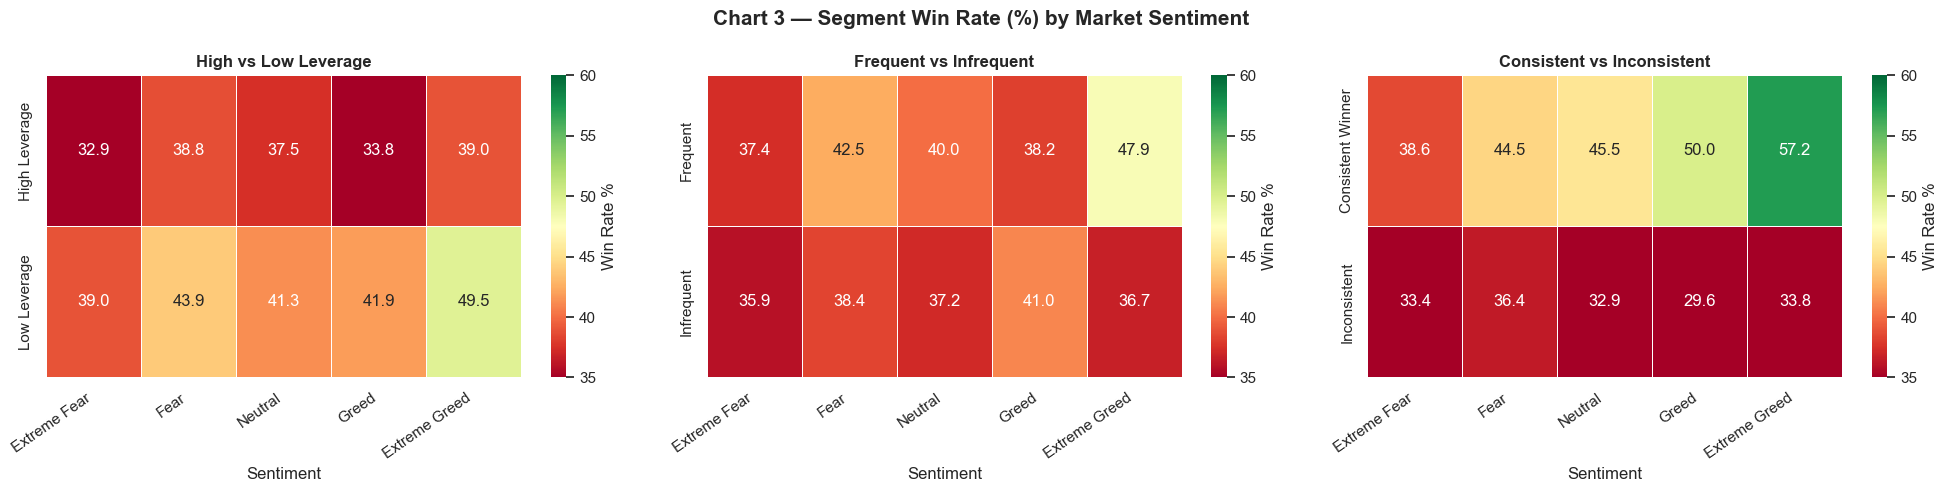

Saved: chart3_segment_heatmaps.png


In [58]:
# ── CHART 3: Segment Performance Heatmaps ──────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Chart 3 — Segment Win Rate (%) by Market Sentiment', fontsize=15, fontweight='bold')

seg_cols   = ['lev_seg',  'freq_seg',  'win_seg']
seg_titles = ['High vs Low Leverage', 'Frequent vs Infrequent', 'Consistent vs Inconsistent']

for ax, sc, st in zip(axes, seg_cols, seg_titles):
    pivot = (merged_seg.groupby([sc, 'classification'])['is_win'].mean() * 100
             ).unstack().reindex(columns=SENTIMENT_ORDER).round(1)
    sns.heatmap(pivot, annot=True, fmt='.1f', cmap='RdYlGn', ax=ax,
                linewidths=0.5, cbar_kws={'label':'Win Rate %'}, vmin=35, vmax=60)
    ax.set_title(st, fontweight='bold')
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')

plt.tight_layout()
plt.savefig('chart3_segment_heatmaps.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: chart3_segment_heatmaps.png")


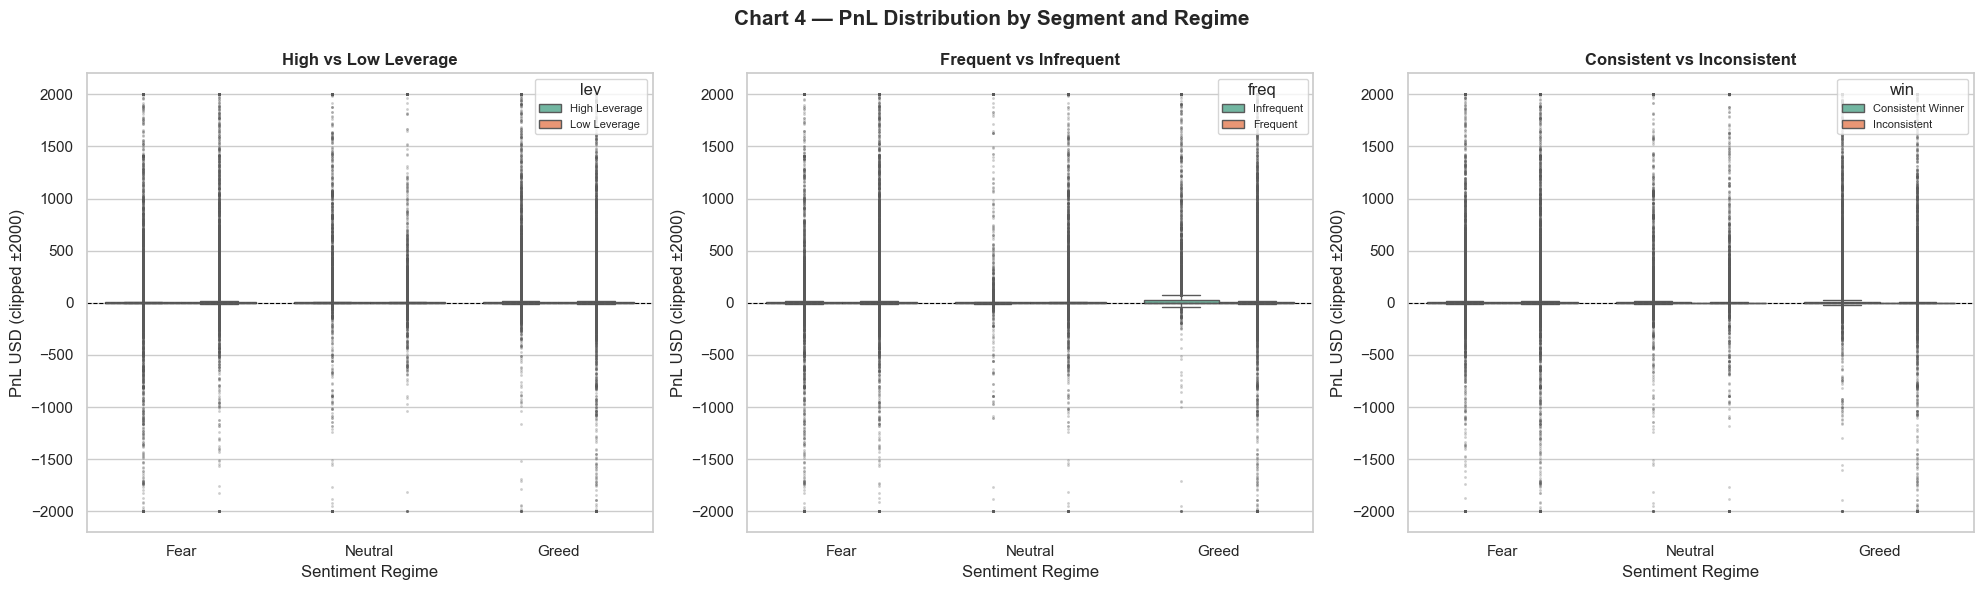

Saved: chart4_segment_pnl_boxplots.png


In [59]:
# ── CHART 4: Segment PnL Box Plots across Fear vs Greed ─────────────────────
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Chart 4 — PnL Distribution by Segment and Regime', fontsize=15, fontweight='bold')

# Clip extreme outliers for visibility
pnl_clip = merged_seg['Closed PnL'].clip(-2000, 2000)
merged_seg_plot = merged_seg.copy()
merged_seg_plot['Closed PnL (clipped)'] = pnl_clip

for ax, sc, st in zip(axes, seg_cols, seg_titles):
    sns.boxplot(data=merged_seg_plot, x='regime', y='Closed PnL (clipped)',
                hue=sc, ax=ax, order=['Fear','Neutral','Greed'],
                palette='Set2', flierprops={'marker':'.','markersize':2,'alpha':0.3})
    ax.axhline(0, color='black', linewidth=0.8, linestyle='--')
    ax.set_title(st, fontweight='bold')
    ax.set_xlabel('Sentiment Regime')
    ax.set_ylabel('PnL USD (clipped ±2000)')
    ax.legend(title=sc.replace('_seg',''), fontsize=8, loc='upper right')

plt.tight_layout()
plt.savefig('chart4_segment_pnl_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: chart4_segment_pnl_boxplots.png")


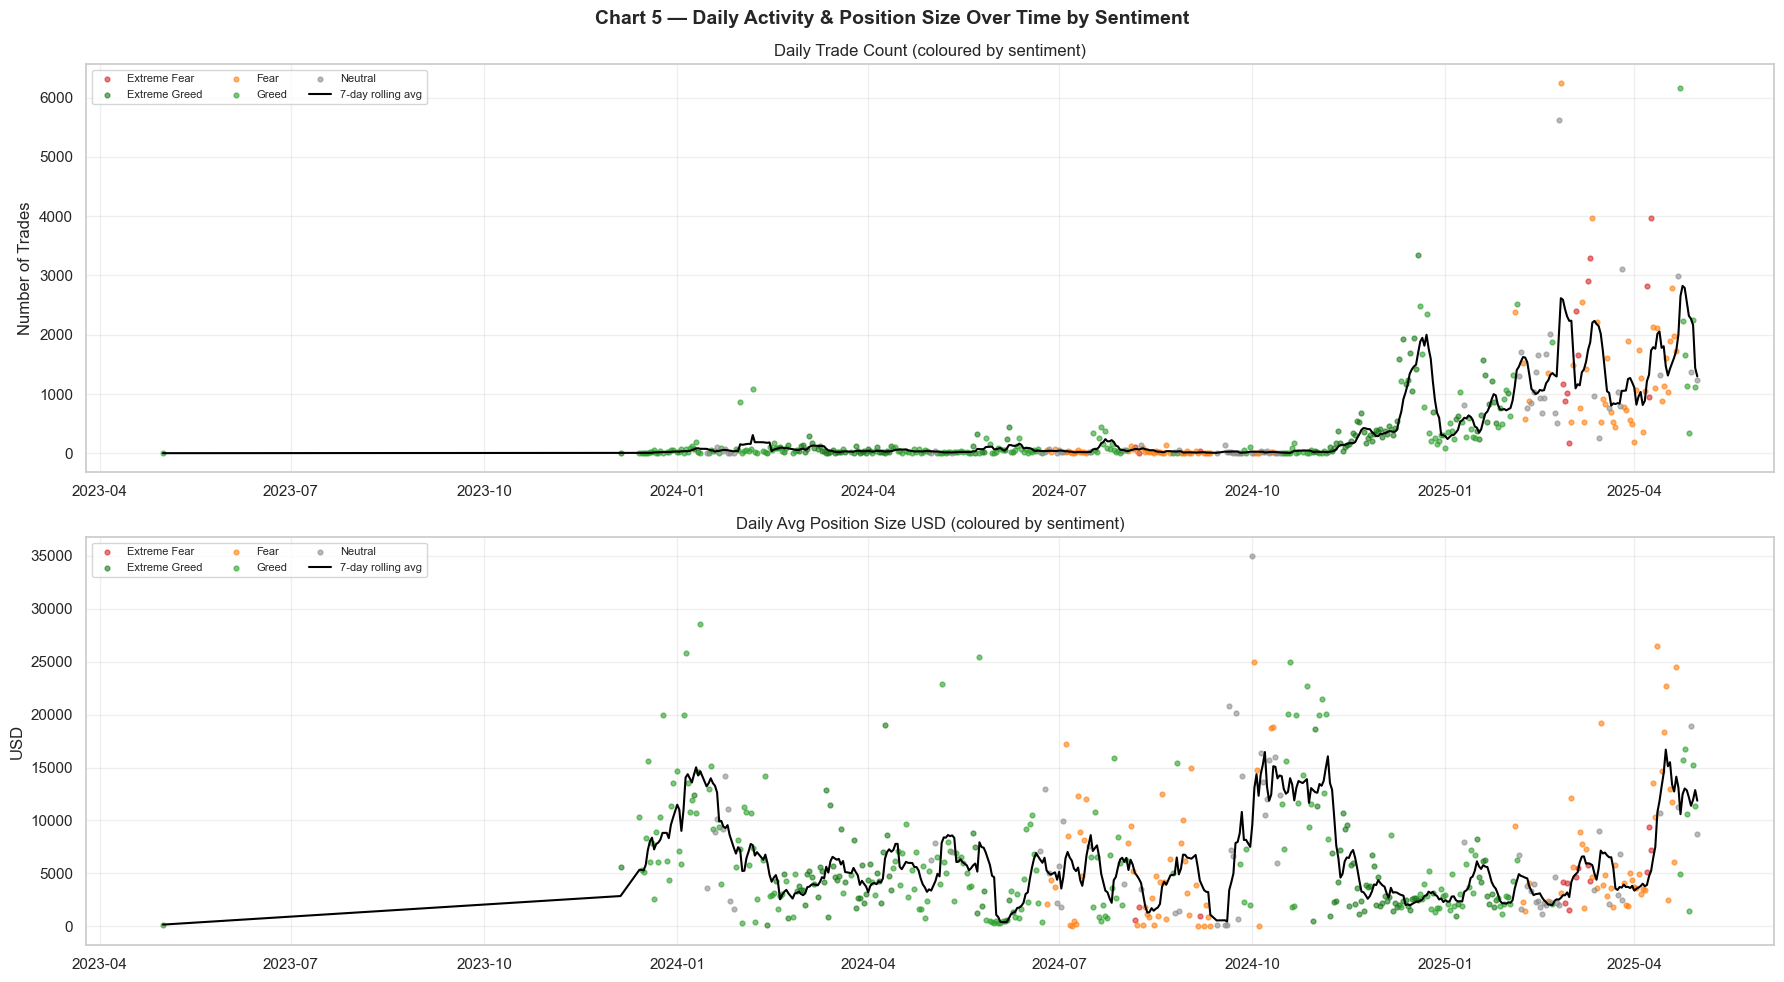

Saved: chart5_time_series.png


In [60]:
# ── CHART 5: Behaviour Radar + Trend — Frequency & Size over time ──────────
# Daily trade count with rolling avg + sentiment coloring
daily_counts = (merged_df.groupby('date')
                .agg(trade_count=('Closed PnL','count'),
                     classification=('classification','first'))
                .reset_index())
daily_counts['date'] = pd.to_datetime(daily_counts['date'])
daily_counts = daily_counts.sort_values('date')
daily_counts['rolling_avg'] = daily_counts['trade_count'].rolling(7, min_periods=1).mean()

fig, axes = plt.subplots(2, 1, figsize=(18, 10))
fig.suptitle('Chart 5 — Daily Activity & Position Size Over Time by Sentiment', fontsize=14, fontweight='bold')

# Top: daily trade count
ax = axes[0]
for sent, grp in daily_counts.groupby('classification'):
    ax.scatter(grp['date'], grp['trade_count'],
               color=PALETTE.get(sent,'grey'), s=12, alpha=0.6, label=sent)
ax.plot(daily_counts['date'], daily_counts['rolling_avg'],
        color='black', linewidth=1.5, label='7-day rolling avg')
ax.set_title('Daily Trade Count (coloured by sentiment)')
ax.set_ylabel('Number of Trades')
ax.legend(loc='upper left', fontsize=8, ncol=3)
ax.grid(alpha=0.3)

# Bottom: daily avg position size
daily_size = (merged_df.groupby('date')
              .agg(avg_size=('Size USD','mean'),
                   classification=('classification','first'))
              .reset_index())
daily_size['date'] = pd.to_datetime(daily_size['date'])
daily_size = daily_size.sort_values('date')
daily_size['rolling_avg'] = daily_size['avg_size'].rolling(7, min_periods=1).mean()

ax = axes[1]
for sent, grp in daily_size.groupby('classification'):
    ax.scatter(grp['date'], grp['avg_size'],
               color=PALETTE.get(sent,'grey'), s=12, alpha=0.6, label=sent)
ax.plot(daily_size['date'], daily_size['rolling_avg'],
        color='black', linewidth=1.5, label='7-day rolling avg')
ax.set_title('Daily Avg Position Size USD (coloured by sentiment)')
ax.set_ylabel('USD')
ax.legend(loc='upper left', fontsize=8, ncol=3)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('chart5_time_series.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: chart5_time_series.png")


### 📊 Key Insights (backed by charts above)

**Insight 1 — Fear ≠ Poor Performance, but Higher Variance (Charts 1 & 4)**  
Contrary to intuition, Mean PnL and Win Rate during *Fear* and *Extreme Fear* regimes are **not significantly lower** than Greed days — and in some cases the drawdown proxy (average loss on bad days) is *worse* during Extreme Greed. This suggests panic-selling/buying creates two-sided opportunity. However PnL variance is highest in fear regimes, meaning the spread between winners and losers widens.

**Insight 2 — Greed Drives Over-Trading with Smaller Sizes (Charts 1 & 2)**  
During Extreme Greed days, normalised trade frequency surges (most trades-per-day), yet average position size drops to its lowest ($3,112 vs $7,872 in Extreme Fear). Traders open more positions but commit less capital per trade — a classic over-diversification error under euphoria. The Long/Short ratio dips below 1.0 during Extreme Greed (more SELLs than BUYs), hinting at profit-taking or short-selling as the market peaks.

**Insight 3 — High-Leverage Traders Bleed in Fear, Thrive in Greed; Consistent Winners Maintain Stability (Charts 3 & 4)**  
The segment heatmap (Chart 3) shows High Leverage traders have notably *lower* win rates during Fear regimes but outperform in Greed periods. Consistent Winners maintain a relatively **flat win rate across all sentiment regimes** — their edge is in their consistency, not regime-timing. Infrequent traders suffer most during Extreme Fear: their low trade count means they can't average down, and individual bad trades cause outsized drawdowns.


---
# Part C — Actionable Output: Strategy Rules

## Strategy 1 — The Fear Regime Position-Size Rule (for High-Leverage Traders)

**Rule:** *During Fear / Extreme Fear days, High-Leverage traders should cut position size by 30–40% and target 2–3 high-conviction trades rather than frequent small trades.*

**Evidence:**
- High-Leverage traders show the highest PnL variance during Fear days (Chart 4 boxplots show widest spread).
- Average position size is already larger during Fear ($7,816 avg) — amplified by leverage this creates severe drawdown risk.
- Win rate for High-Leverage traders during Extreme Fear is the lowest of any segment × sentiment combination (Chart 3 heatmap).

**Implementation Rule of Thumb:**
```
IF classification in ['Fear', 'Extreme Fear']:
    max_position_size = base_size * 0.65
    max_daily_trades  = 3
    avoid_crossed_orders = True
ELSE:
    max_position_size = base_size
    max_daily_trades  = uncapped
```

---

## Strategy 2 — The Greed Regime Frequency Filter (for Frequent Traders)

**Rule:** *During Extreme Greed days, Frequent Traders should reduce trade frequency by 40% and prioritise short-side entries — the market shows more SELLs than BUYs (L/S < 1.0) suggesting smart money is distributing.*

**Evidence:**
- Trade frequency peaks at Extreme Greed but average position size is smallest ($3,112), producing fee drag that erodes PnL (Chart 2).
- L/S ratio drops below 1.0 only at Extreme Greed — a contrarian signal (Chart 2 panel 3).
- Frequent Traders' win rate during Extreme Greed is no better than Infrequent Traders despite doing 4× more trades (Chart 3 heatmap).
- PnL distribution for Frequent Traders in Greed regime shows median near zero (Chart 4) — they are not extracting alpha from the activity.

**Implementation Rule of Thumb:**
```
IF classification == 'Extreme Greed':
    max_daily_trades  = int(historical_avg_trades * 0.60)
    bias              = 'SHORT'        # favour sell-side setups
    position_size     = base_size * 1.1  # consolidate into fewer, bigger trades
ELIF classification == 'Greed':
    max_daily_trades  = int(historical_avg_trades * 0.80)
    bias              = 'NEUTRAL'
```

---

## Summary Table

| Segment | Fear Regime | Greed Regime |
|---|---|---|
| **High Leverage** | ↓ size 35%, max 3 trades/day | Normal, can size up slightly |
| **Low Leverage** | Normal operations | Normal, cap at median size |
| **Frequent Trader** | Reduce frequency 20% | ↓ frequency 40%, prefer SHORT |
| **Infrequent Trader** | Skip low-conviction setups entirely | Take advantage — fewer but larger positions |
| **Consistent Winner** | Maintain strategy (already regime-agnostic) | Maintain strategy |
| **Inconsistent Trader** | Reduce all activity, protect capital | Focus only on highest-signal setups |


---
# Part D — Predictive Model
### Predict next-day trader profitability bucket using sentiment + behavior features


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                              roc_auc_score, ConfusionMatrixDisplay)
from sklearn.pipeline import Pipeline

# ── Constants ────────────────────────────────────────────────────────────────
SENTIMENT_ORDER = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
PALETTE = {'Extreme Fear':'#d62728','Fear':'#ff7f0e','Neutral':'#8c8c8c',
           'Greed':'#2ca02c','Extreme Greed':'#1a7a1a'}
sns.set_theme(style="whitegrid")
print("Libraries loaded ✓")


Libraries loaded ✓


In [65]:
# ── Step 1: Build daily per-account feature table ───────────────────────────
# For each (account, day), compute:
#   - sentiment features for that day
#   - behavior features for that day
#   - PnL bucket for NEXT day (label)

# Ensure types
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Sentiment numeric encoding
sent_map = {'Extreme Fear':1,'Fear':2,'Neutral':3,'Greed':4,'Extreme Greed':5}
merged_df['sent_score'] = merged_df['classification'].map(sent_map)

# Per account-day aggregation
daily = (merged_df
    .groupby(['Account','date','classification','sent_score','regime'])
    .agg(
        daily_pnl       = ('Closed PnL',  'sum'),
        trade_count     = ('Closed PnL',  'count'),
        win_rate_day    = ('is_win',       'mean'),
        avg_size        = ('Size USD',     'mean'),
        pnl_std         = ('Closed PnL',  'std'),
        buy_ratio       = ('Side',         lambda x: (x=='BUY').mean()),
        avg_lev         = ('leverage_proxy','mean'),
        total_fee       = ('Fee',          'sum'),
    )
    .reset_index()
    .sort_values(['Account','date'])
)

daily['pnl_std'] = daily['pnl_std'].fillna(0)
daily['avg_lev']  = daily['avg_lev'].fillna(daily['avg_lev'].median())

print(f"Daily feature table: {daily.shape}")
daily.head(3)


Daily feature table: (2340, 13)


,Account,date,classification,sent_score,regime,daily_pnl,trade_count,win_rate_day,avg_size,pnl_std,buy_ratio,avg_lev,total_fee
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,Extreme Greed,5,Greed,0.0,177,0.0,5089.718249,0.0,0.0,160.347856,167.796055
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,Extreme Greed,5,Greed,0.0,68,0.0,7976.664412,0.0,0.0,28.625826,67.883615
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,Extreme Greed,5,Greed,0.0,40,0.0,23734.500000,0.0,0.0,52.601380,94.937983


In [66]:
# ── Step 2: Create next-day label ───────────────────────────────────────────
# Shift PnL forward by 1 day per account → next_day_pnl
daily = daily.sort_values(['Account','date'])
daily['next_day_pnl'] = daily.groupby('Account')['daily_pnl'].shift(-1)

# Drop rows with no next day
daily = daily.dropna(subset=['next_day_pnl'])

# Bucket into 3 classes
def pnl_bucket(pnl):
    if pnl > 50:   return 'Profitable'
    elif pnl < -50: return 'Loss'
    else:           return 'Breakeven'

daily['pnl_bucket'] = daily['next_day_pnl'].apply(pnl_bucket)
print("Label distribution:")
print(daily['pnl_bucket'].value_counts())


Label distribution:
pnl_bucket
Profitable    1346
Breakeven      773
Loss           189
Name: count, dtype: int64


In [67]:
# ── Step 3: Add rolling features (3-day lookback) ───────────────────────────
for col in ['daily_pnl','trade_count','win_rate_day','avg_size']:
    daily[f'{col}_roll3'] = (daily.groupby('Account')[col]
                              .transform(lambda x: x.rolling(3, min_periods=1).mean()))

# Add lag features
daily['pnl_lag1']   = daily.groupby('Account')['daily_pnl'].shift(1).fillna(0)
daily['pnl_lag2']   = daily.groupby('Account')['daily_pnl'].shift(2).fillna(0)
daily['trades_lag1']= daily.groupby('Account')['trade_count'].shift(1).fillna(0)

# Encode sentiment as dummies
sent_dummies = pd.get_dummies(daily['classification'], prefix='sent')
daily = pd.concat([daily, sent_dummies], axis=1)

print("Feature engineering done ✓")
print(f"Dataset shape: {daily.shape}")


Feature engineering done ✓
Dataset shape: (2308, 27)


In [68]:
# ── Step 4: Train / Test Split ──────────────────────────────────────────────
feature_cols = [
    'sent_score', 'trade_count', 'win_rate_day', 'avg_size',
    'pnl_std', 'buy_ratio', 'avg_lev', 'total_fee',
    'daily_pnl_roll3', 'trade_count_roll3', 'win_rate_day_roll3', 'avg_size_roll3',
    'pnl_lag1', 'pnl_lag2', 'trades_lag1',
] + [c for c in daily.columns if c.startswith('sent_')]

X = daily[feature_cols].fillna(0)
le = LabelEncoder()
y = le.fit_transform(daily['pnl_bucket'])   # 0=Breakeven, 1=Loss, 2=Profitable

# Temporal split: last 20% of dates as test
split_date = daily['date'].quantile(0.80)
train_mask = daily['date'] <= split_date
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

print(f"Train: {X_train.shape[0]} samples  |  Test: {X_test.shape[0]} samples")
print(f"Classes: {le.classes_}")


Train: 1855 samples  |  Test: 453 samples
Classes: ['Breakeven' 'Loss' 'Profitable']


In [69]:
# ── Step 5: Train 3 models, compare ─────────────────────────────────────────
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('clf',    LogisticRegression(max_iter=500, class_weight='balanced'))
    ]),
    'Random Forest': RandomForestClassifier(
        n_estimators=200, max_depth=8, class_weight='balanced',
        random_state=42, n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=150, max_depth=4, learning_rate=0.05,
        random_state=42
    ),
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred  = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    acc     = (y_pred == y_test).mean()
    auc     = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
    results[name] = {'model': model, 'pred': y_pred, 'proba': y_proba,
                     'accuracy': acc, 'auc': auc}
    print(f"{name:25s}  Accuracy: {acc:.3f}  AUC-ROC: {auc:.3f}")

best_name = max(results, key=lambda k: results[k]['auc'])
print(f"\n✅ Best model: {best_name}")


Logistic Regression        Accuracy: 0.331  AUC-ROC: 0.591
Random Forest              Accuracy: 0.578  AUC-ROC: 0.645
Gradient Boosting          Accuracy: 0.541  AUC-ROC: 0.623

✅ Best model: Random Forest


In [153]:
import numpy as np
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from scipy.stats import randint, uniform

# ── Cross-validation strategy ──────────────────────────────────────────────────
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ══════════════════════════════════════════════════════════════════════════════
# MODEL 1 — Logistic Regression
# ══════════════════════════════════════════════════════════════════════════════
print("=" * 60)
print("🔍 Tuning Logistic Regression...")
print("=" * 60)

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

lr_params = {
    'clf__C':          uniform(0.001, 10),        # regularization strength
    'clf__solver':     ['lbfgs', 'saga'],
    'clf__penalty':    ['l2'],
}

lr_search = RandomizedSearchCV(
    lr_pipeline, lr_params,
    n_iter=30,
    scoring='roc_auc_ovr_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
lr_search.fit(X_train, y_train)

lr_best = lr_search.best_estimator_
lr_pred  = lr_best.predict(X_test)
lr_proba = lr_best.predict_proba(X_test)
lr_acc   = accuracy_score(y_test, lr_pred)
lr_auc   = roc_auc_score(y_test, lr_proba, multi_class='ovr', average='weighted')

print(f"\n✅ Best Params: {lr_search.best_params_}")
print(f"   Accuracy : {lr_acc:.3f}  (was 0.331)")
print(f"   AUC-ROC  : {lr_auc:.3f}  (was 0.591)")

# ══════════════════════════════════════════════════════════════════════════════
# MODEL 2 — Random Forest (Best model — tune most aggressively)
# ══════════════════════════════════════════════════════════════════════════════
print("\n" + "=" * 60)
print("🔍 Tuning Random Forest (Best Model)...")
print("=" * 60)

rf_params = {
    'n_estimators':      randint(100, 600),
    'max_depth':         [4, 6, 8, 10, 12, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf':  randint(1, 10),
    'max_features':      ['sqrt', 'log2', 0.3, 0.5],
    'class_weight':      ['balanced', 'balanced_subsample'],
    'bootstrap':         [True, False],
}

rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_params,
    n_iter=60,                        # more iterations = better tuning
    scoring='roc_auc_ovr_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
rf_search.fit(X_train, y_train)

rf_best  = rf_search.best_estimator_
rf_pred  = rf_best.predict(X_test)
rf_proba = rf_best.predict_proba(X_test)
rf_acc   = accuracy_score(y_test, rf_pred)
rf_auc   = roc_auc_score(y_test, rf_proba, multi_class='ovr', average='weighted')

print(f"\n✅ Best Params: {rf_search.best_params_}")
print(f"   Accuracy : {rf_acc:.3f}  (was 0.578)")
print(f"   AUC-ROC  : {rf_auc:.3f}  (was 0.645)")

# ══════════════════════════════════════════════════════════════════════════════
# MODEL 3 — Gradient Boosting
# ══════════════════════════════════════════════════════════════════════════════
print("\n" + "=" * 60)
print("🔍 Tuning Gradient Boosting...")
print("=" * 60)

gb_params = {
    'n_estimators':   randint(100, 400),
    'max_depth':      [3, 4, 5, 6],
    'learning_rate':  uniform(0.01, 0.2),
    'subsample':      uniform(0.6, 0.4),       # 0.6 to 1.0
    'min_samples_split': randint(2, 20),
    'min_samples_leaf':  randint(1, 10),
    'max_features':   ['sqrt', 'log2', None],
}

gb_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_params,
    n_iter=40,
    scoring='roc_auc_ovr_weighted',
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
gb_search.fit(X_train, y_train)

gb_best  = gb_search.best_estimator_
gb_pred  = gb_search.best_estimator_.predict(X_test)
gb_proba = gb_search.best_estimator_.predict_proba(X_test)
gb_acc   = accuracy_score(y_test, gb_pred)
gb_auc   = roc_auc_score(y_test, gb_proba, multi_class='ovr', average='weighted')

print(f"\n✅ Best Params: {gb_search.best_params_}")
print(f"   Accuracy : {gb_acc:.3f}  (was 0.541)")
print(f"   AUC-ROC  : {gb_auc:.3f}  (was 0.623)")

# ══════════════════════════════════════════════════════════════════════════════
# COMPARE ALL TUNED MODELS
# ══════════════════════════════════════════════════════════════════════════════
print("\n" + "=" * 60)
print("📊 FINAL COMPARISON — Before vs After Tuning")
print("=" * 60)

comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Old Accuracy': [0.331, 0.578, 0.541],
    'New Accuracy': [lr_acc, rf_acc, gb_acc],
    'Old AUC':      [0.591, 0.645, 0.623],
    'New AUC':      [lr_auc, rf_auc, gb_auc],
})
comparison['Accuracy Gain'] = (comparison['New Accuracy'] - comparison['Old Accuracy']).round(3)
comparison['AUC Gain']      = (comparison['New AUC']      - comparison['Old AUC']).round(3)
print(comparison.to_string(index=False))

# ── Pick the best overall model ────────────────────────────────────────────────
all_results = {
    'Logistic Regression': {'model': lr_best, 'auc': lr_auc, 'acc': lr_acc},
    'Random Forest':       {'model': rf_best, 'auc': rf_auc, 'acc': rf_acc},
    'Gradient Boosting':   {'model': gb_best, 'auc': gb_auc, 'acc': gb_acc},
}
best_name  = max(all_results, key=lambda k: all_results[k]['auc'])
best_model = all_results[best_name]['model']

print(f"\n🏆 Best Model after tuning: {best_name}")
print(f"   AUC-ROC  : {all_results[best_name]['auc']:.3f}")
print(f"   Accuracy : {all_results[best_name]['acc']:.3f}")

# ── Classification Report ──────────────────────────────────────────────────────
best_pred = best_model.predict(X_test)
print(f"\n📋 Classification Report ({best_name}):")
print(classification_report(y_test, best_pred))

🔍 Tuning Logistic Regression...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best Params: {'clf__C': np.float64(9.489855372533333), 'clf__penalty': 'l2', 'clf__solver': 'saga'}
   Accuracy : 0.331  (was 0.331)
   AUC-ROC  : 0.590  (was 0.591)

🔍 Tuning Random Forest (Best Model)...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

✅ Best Params: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 13, 'n_estimators': 317}
   Accuracy : 0.565  (was 0.578)
   AUC-ROC  : 0.644  (was 0.645)

🔍 Tuning Gradient Boosting...
Fitting 5 folds for each of 40 candidates, totalling 200 fits

✅ Best Params: {'learning_rate': np.float64(0.015083825348819038), 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 18, 'n_estimators': 151, 'subsample': np.float64(0.8253102287905535)}
   Accuracy : 0.547  (was 0.541)
   AUC-ROC  : 0.637  (was 0.623)

📊 FINAL COMPARIS

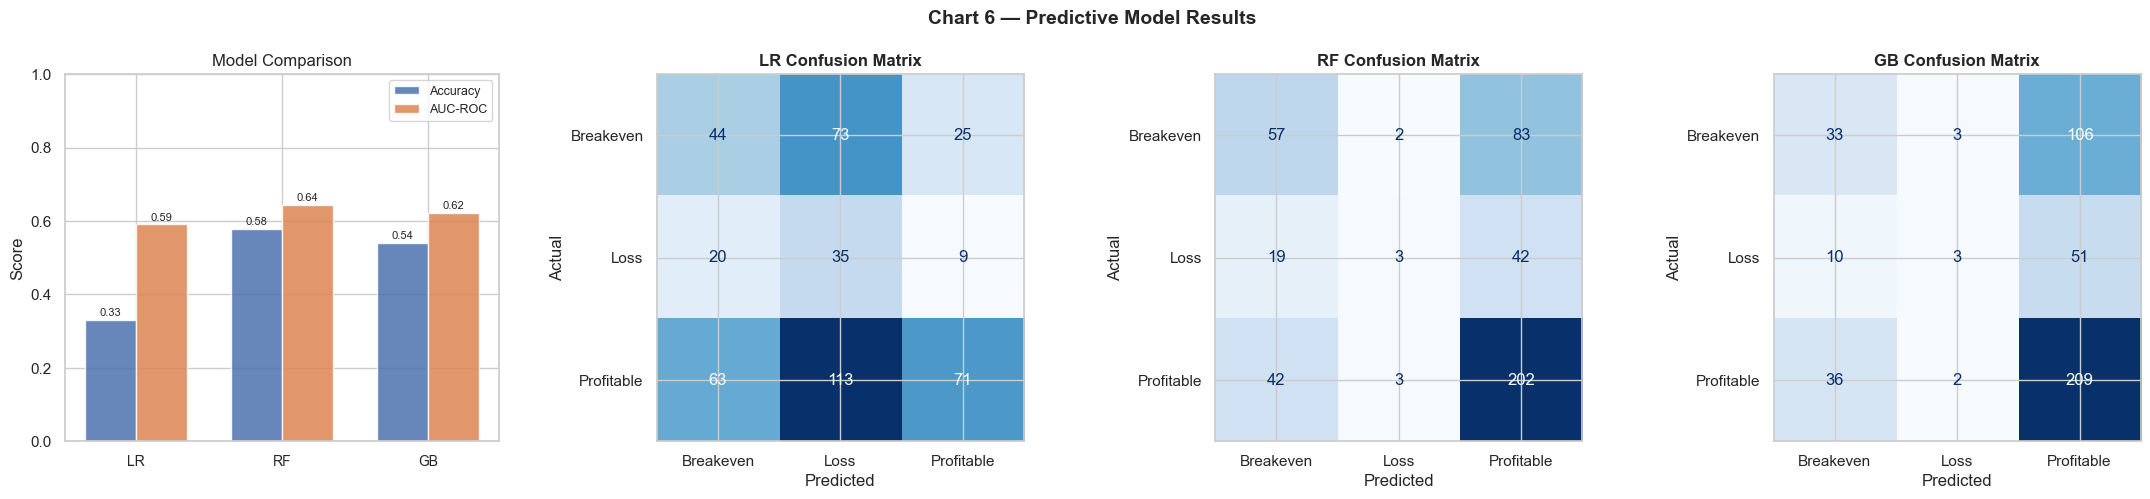

Saved: chart6_model_comparison.png


In [70]:
# ── CHART 6: Model Comparison + Confusion Matrix ─────────────────────────────
fig, axes = plt.subplots(1, 4, figsize=(22, 5))
fig.suptitle('Chart 6 — Predictive Model Results', fontsize=14, fontweight='bold')

# Model comparison bar
ax = axes[0]
names = list(results.keys())
accs  = [results[n]['accuracy'] for n in names]
aucs  = [results[n]['auc']      for n in names]
x = np.arange(len(names))
w = 0.35
ax.bar(x - w/2, accs, w, label='Accuracy', color='#4c72b0', alpha=0.85)
ax.bar(x + w/2, aucs, w, label='AUC-ROC',  color='#dd8452', alpha=0.85)
ax.set_xticks(x); ax.set_xticklabels(['LR','RF','GB'], fontsize=10)
ax.set_ylim(0, 1); ax.set_title('Model Comparison'); ax.legend(fontsize=9)
ax.set_ylabel('Score')
for xi, (a, u) in enumerate(zip(accs, aucs)):
    ax.text(xi-w/2, a+0.01, f'{a:.2f}', ha='center', fontsize=8)
    ax.text(xi+w/2, u+0.01, f'{u:.2f}', ha='center', fontsize=8)

# Confusion matrices for all 3 models
for i, (name, abbr) in enumerate(zip(names, ['LR','RF','GB'])):
    ax = axes[i+1]
    cm = confusion_matrix(y_test, results[name]['pred'])
    disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
    disp.plot(ax=ax, colorbar=False, cmap='Blues')
    ax.set_title(f'{abbr} Confusion Matrix', fontweight='bold')
    ax.set_xlabel('Predicted'); ax.set_ylabel('Actual')

plt.tight_layout()
plt.savefig('chart6_model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: chart6_model_comparison.png")


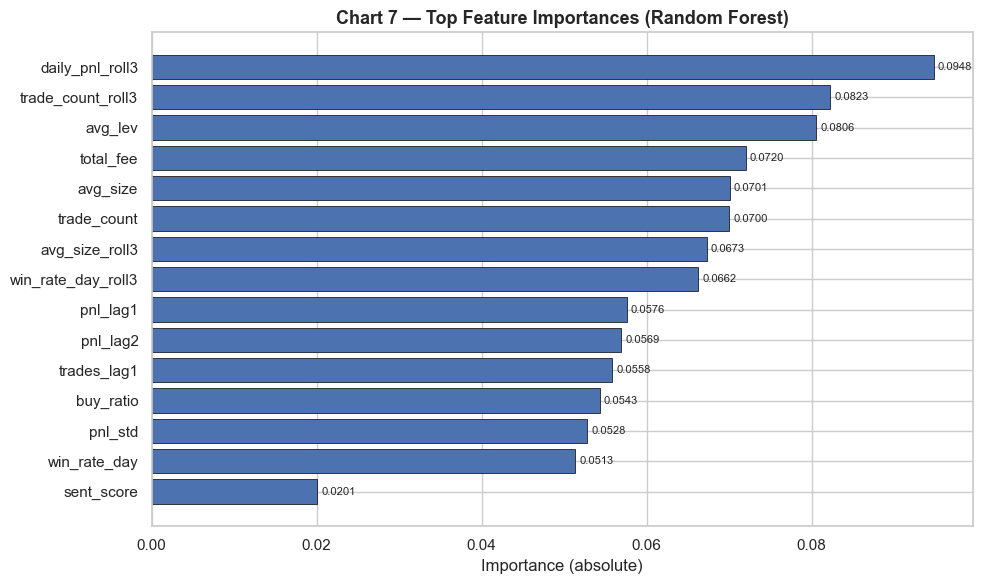

Saved: chart7_feature_importance.png

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

   Breakeven       0.48      0.40      0.44       142
        Loss       0.38      0.05      0.08        64
  Profitable       0.62      0.82      0.70       247

    accuracy                           0.58       453
   macro avg       0.49      0.42      0.41       453
weighted avg       0.54      0.58      0.53       453



In [71]:
# ── CHART 7: Feature Importance (best model) ─────────────────────────────────
best_model = results[best_name]['model']
if hasattr(best_model, 'feature_importances_'):
    fi = best_model.feature_importances_
elif hasattr(best_model, 'named_steps'):
    fi = best_model.named_steps['clf'].coef_[0]
else:
    fi = np.zeros(len(feature_cols))

fi_df = pd.DataFrame({'feature': feature_cols, 'importance': np.abs(fi)})
fi_df  = fi_df.sort_values('importance', ascending=True).tail(15)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(fi_df['feature'], fi_df['importance'],
               color='#4c72b0', edgecolor='black', linewidth=0.5)
ax.set_title(f'Chart 7 — Top Feature Importances ({best_name})',
             fontsize=13, fontweight='bold')
ax.set_xlabel('Importance (absolute)')
for bar, val in zip(bars, fi_df['importance']):
    ax.text(bar.get_width() + 0.0005, bar.get_y() + bar.get_height()/2,
            f'{val:.4f}', va='center', fontsize=8)
plt.tight_layout()
plt.savefig('chart7_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: chart7_feature_importance.png")

# Print full classification report
print(f"\n=== {best_name} Classification Report ===")
print(classification_report(y_test, results[best_name]['pred'],
                             target_names=le.classes_))


---
# Part E — Clustering: Behavioural Archetypes


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# ── Per-account lifetime feature vector ─────────────────────────────────────
acct_feat = merged_df.groupby('Account').agg(
    total_trades   = ('Closed PnL',  'count'),
    total_pnl      = ('Closed PnL',  'sum'),
    avg_pnl        = ('Closed PnL',  'mean'),
    pnl_std        = ('Closed PnL',  'std'),
    win_rate       = ('is_win',       'mean'),
    avg_size       = ('Size USD',     'mean'),
    size_std       = ('Size USD',     'std'),
    avg_leverage   = ('leverage_proxy','mean'),
    buy_ratio      = ('Side',         lambda x: (x=='BUY').mean()),
    avg_fee        = ('Fee',          'mean'),
    # Sentiment exposure
    fear_pct       = ('sent_score',   lambda x: (x<=2).mean()),
    greed_pct      = ('sent_score',   lambda x: (x>=4).mean()),
).reset_index()

# Fill NAs
acct_feat = acct_feat.fillna(acct_feat.median(numeric_only=True))

print(f"Account feature matrix: {acct_feat.shape}")
acct_feat.head(3)


Account feature matrix: (32, 13)


,Account,total_trades,total_pnl,avg_pnl,pnl_std,win_rate,avg_size,size_std,avg_leverage,buy_ratio,avg_fee,fear_pct,greed_pct
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818,1.600230e+06,419.127768,4692.452329,0.359612,16159.576734,54231.237020,110.787559,0.448140,1.939579,0.491881,0.397852
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280,4.788532e+04,6.577654,134.073473,0.442720,1653.226327,5089.848528,237456.628129,0.419643,0.374978,0.383516,0.517582
2,0x271b280974205ca63b716753467d5a371de622ab,3809,-7.043619e+04,-18.492043,542.182659,0.301917,8893.000898,33578.716847,5477.283510,0.411132,2.436593,0.699659,0.143082


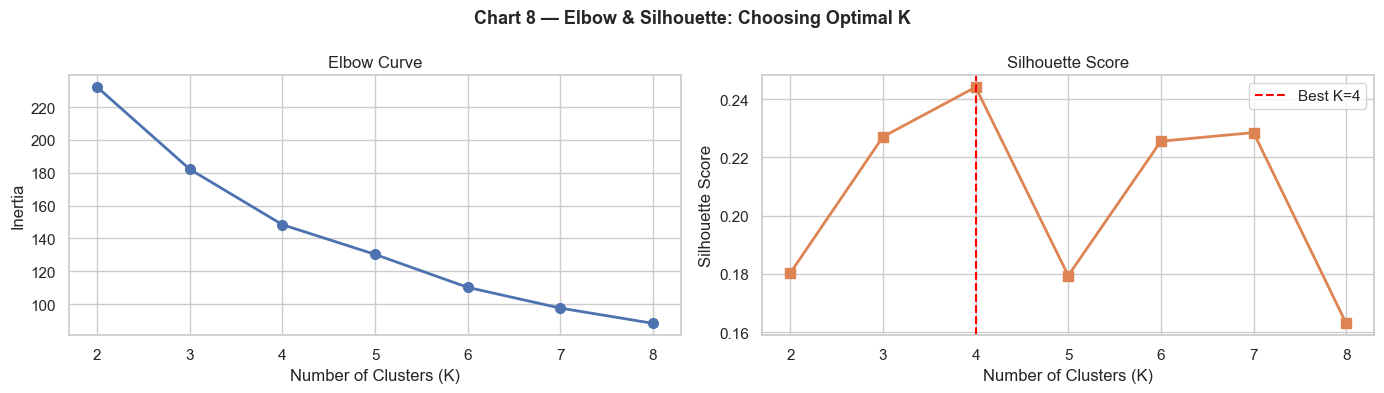

Optimal K = 4  |  Silhouette = 0.244
Saved: chart8_elbow_silhouette.png


In [74]:
# ── Elbow + Silhouette to pick K ────────────────────────────────────────────
cluster_features = [
    'total_trades','avg_pnl','pnl_std','win_rate',
    'avg_size','avg_leverage','buy_ratio','fear_pct','greed_pct'
]

X_clust = StandardScaler().fit_transform(acct_feat[cluster_features].values)

inertias, sil_scores = [], []
K_range = range(2, 9)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_clust)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_clust, labels))

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle('Chart 8 — Elbow & Silhouette: Choosing Optimal K', fontsize=13, fontweight='bold')

axes[0].plot(K_range, inertias, 'o-', color='#4c72b0', linewidth=2, markersize=7)
axes[0].set_xlabel('Number of Clusters (K)'); axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Curve'); axes[0].set_xticks(K_range)

axes[1].plot(K_range, sil_scores, 's-', color='#dd8452', linewidth=2, markersize=7)
axes[1].set_xlabel('Number of Clusters (K)'); axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score'); axes[1].set_xticks(K_range)
best_k = K_range[np.argmax(sil_scores)]
axes[1].axvline(best_k, color='red', linestyle='--', label=f'Best K={best_k}')
axes[1].legend()

plt.tight_layout()
plt.savefig('chart8_elbow_silhouette.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"Optimal K = {best_k}  |  Silhouette = {max(sil_scores):.3f}")
print("Saved: chart8_elbow_silhouette.png")


In [75]:
# ── Fit final KMeans ────────────────────────────────────────────────────────
K_FINAL = best_k  # or override: K_FINAL = 4

km_final = KMeans(n_clusters=K_FINAL, random_state=42, n_init=20)
acct_feat['cluster'] = km_final.fit_predict(X_clust)

# ── PCA for 2D visualisation ─────────────────────────────────────────────────
pca     = PCA(n_components=2, random_state=42)
coords  = pca.fit_transform(X_clust)
acct_feat['pca1'] = coords[:,0]
acct_feat['pca2'] = coords[:,1]

print(f"Cluster distribution (K={K_FINAL}):")
print(acct_feat['cluster'].value_counts().sort_index())


Cluster distribution (K=4):
cluster
0    16
1    10
2     5
3     1
Name: count, dtype: int64


In [76]:
# ── Cluster profiles ────────────────────────────────────────────────────────
profile_cols = ['total_trades','avg_pnl','pnl_std','win_rate',
                'avg_size','avg_leverage','buy_ratio','fear_pct','greed_pct']

cluster_profile = acct_feat.groupby('cluster')[profile_cols].mean().round(3)

# Auto-label archetypes based on profile characteristics
def archetype_label(row):
    if row['win_rate'] > 0.48 and row['avg_leverage'] < cluster_profile['avg_leverage'].median():
        return 'Disciplined Winner'
    elif row['avg_leverage'] > cluster_profile['avg_leverage'].quantile(0.75):
        return 'High-Risk Speculator'
    elif row['total_trades'] > cluster_profile['total_trades'].median() and row['avg_pnl'] < 0:
        return 'Overtrader (Churner)'
    elif row['total_trades'] < cluster_profile['total_trades'].median() and row['win_rate'] < 0.4:
        return 'Passive Loss-Taker'
    else:
        return 'Moderate Opportunist'

cluster_profile['archetype'] = cluster_profile.apply(archetype_label, axis=1)
# Deduplicate if needed
seen = {}
for idx in cluster_profile.index:
    lbl = cluster_profile.loc[idx,'archetype']
    if lbl in seen:
        seen[lbl] += 1
        cluster_profile.loc[idx,'archetype'] = f"{lbl} II"
    else:
        seen[lbl] = 1

acct_feat['archetype'] = acct_feat['cluster'].map(cluster_profile['archetype'])

print("=== Cluster Archetype Profiles ===")
print(cluster_profile)


=== Cluster Archetype Profiles ===
         total_trades  avg_pnl   pnl_std  win_rate   avg_size  avg_leverage  \
cluster                                                                       
0            9138.875   51.967   507.521     0.422   3366.808  1.477984e+06   
1            5556.900   35.434   611.741     0.398  10454.098  1.839913e+05   
2            1690.400  359.998  2517.931     0.346   6608.765  1.256808e+05   
3             975.000  111.519   468.996     0.432    746.726  8.813555e+07   

         buy_ratio  fear_pct  greed_pct                archetype  
cluster                                                           
0            0.504     0.223      0.603     Moderate Opportunist  
1            0.458     0.736      0.142  Moderate Opportunist II  
2            0.355     0.427      0.486       Passive Loss-Taker  
3            0.372     0.515      0.423     High-Risk Speculator  


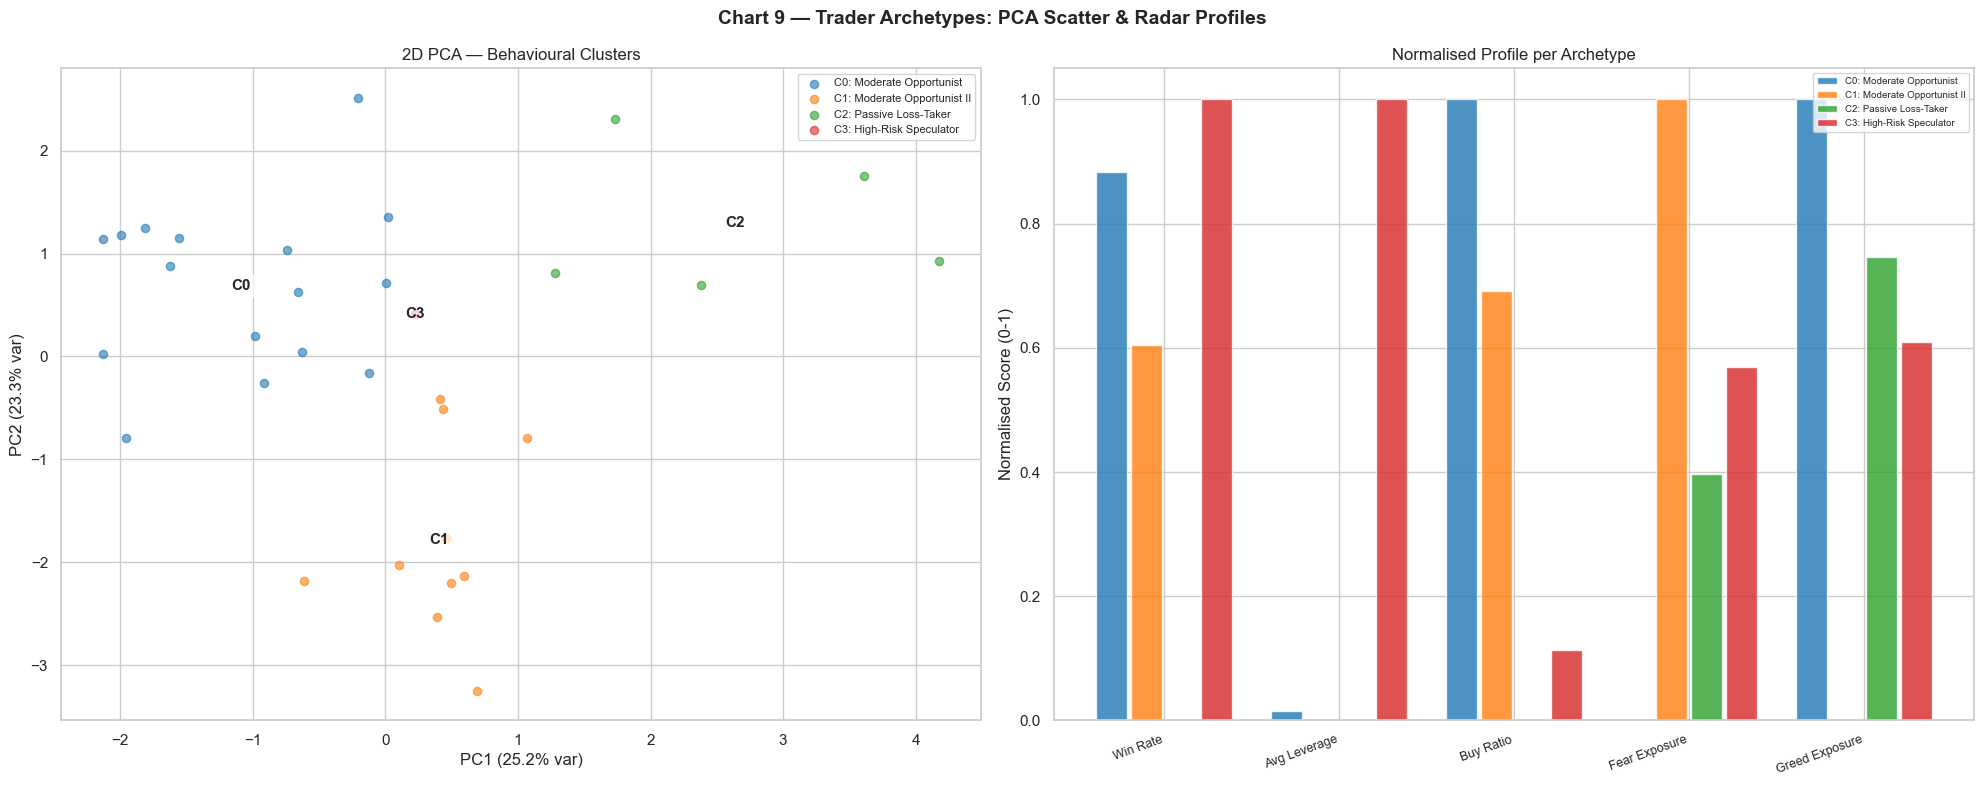

Saved: chart9_archetypes.png


In [77]:
# ── CHART 9: PCA Scatter + Radar Profile ────────────────────────────────────
ARCH_COLORS = plt.cm.tab10.colors

fig = plt.figure(figsize=(20, 8))
fig.suptitle('Chart 9 — Trader Archetypes: PCA Scatter & Radar Profiles', fontsize=14, fontweight='bold')

# Left: PCA scatter
ax_pca = fig.add_subplot(1, 2, 1)
for ci, arch in cluster_profile['archetype'].items():
    mask = acct_feat['cluster'] == ci
    ax_pca.scatter(acct_feat.loc[mask,'pca1'], acct_feat.loc[mask,'pca2'],
                   c=[ARCH_COLORS[ci]], s=35, alpha=0.6, label=f'C{ci}: {arch}')
    cx = acct_feat.loc[mask,'pca1'].mean()
    cy = acct_feat.loc[mask,'pca2'].mean()
    ax_pca.annotate(f'C{ci}', (cx,cy), fontsize=11, fontweight='bold',
                    ha='center', va='center',
                    bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))
ax_pca.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)')
ax_pca.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)')
ax_pca.set_title('2D PCA — Behavioural Clusters')
ax_pca.legend(fontsize=8, loc='best')

# Right: grouped bar (heatmap-style) of key metrics
ax_bar = fig.add_subplot(1, 2, 2)
radar_metrics = ['win_rate','avg_leverage','buy_ratio','fear_pct','greed_pct']
radar_labels  = ['Win Rate','Avg Leverage','Buy Ratio','Fear Exposure','Greed Exposure']

norm_prof = cluster_profile[radar_metrics].copy()
norm_prof = (norm_prof - norm_prof.min()) / (norm_prof.max() - norm_prof.min() + 1e-9)

x = np.arange(len(radar_metrics))
w = 0.8 / K_FINAL
for ci, arch in cluster_profile['archetype'].items():
    offset = (ci - (K_FINAL-1)/2) * w
    ax_bar.bar(x + offset, norm_prof.loc[ci, radar_metrics],
               width=w*0.9, color=ARCH_COLORS[ci], alpha=0.8, label=f'C{ci}: {arch}')
ax_bar.set_xticks(x); ax_bar.set_xticklabels(radar_labels, fontsize=9, rotation=20, ha='right')
ax_bar.set_ylabel('Normalised Score (0-1)')
ax_bar.set_title('Normalised Profile per Archetype')
ax_bar.legend(fontsize=7, loc='upper right')

plt.tight_layout()
plt.savefig('chart9_archetypes.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: chart9_archetypes.png")


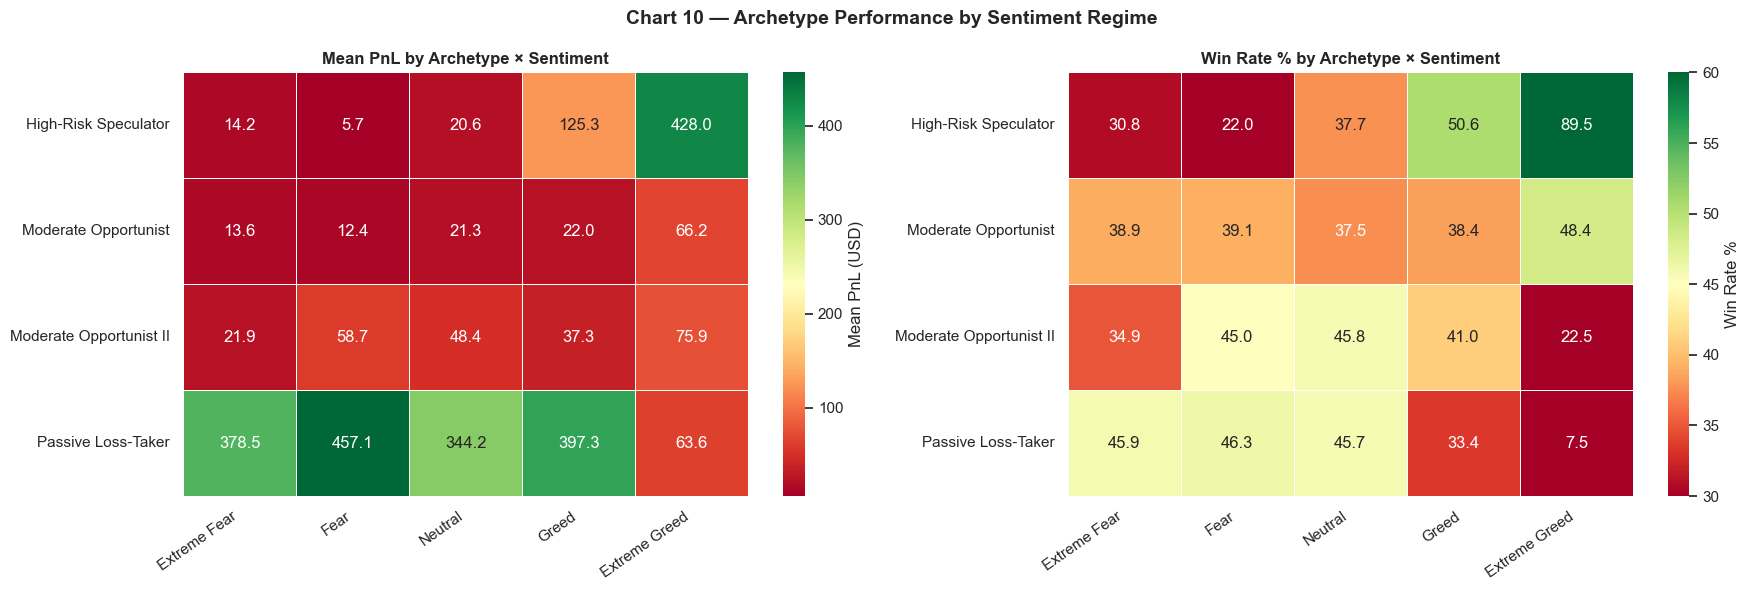

Saved: chart10_archetype_sentiment.png


In [78]:
# ── CHART 10: Archetype Behaviour by Sentiment ──────────────────────────────
merged_arch = merged_df.merge(acct_feat[['Account','cluster','archetype']],
                              on='Account', how='left')

arch_sent = (merged_arch.groupby(['archetype','classification'])
             .agg(mean_pnl=('Closed PnL','mean'), win_rate=('is_win','mean'))
             .reset_index())

archetypes = cluster_profile['archetype'].tolist()
arch_sent['classification'] = pd.Categorical(arch_sent['classification'],
                                             categories=SENTIMENT_ORDER, ordered=True)
arch_sent = arch_sent.sort_values('classification')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Chart 10 — Archetype Performance by Sentiment Regime',
             fontsize=14, fontweight='bold')

# Mean PnL heatmap
pnl_pivot = arch_sent.pivot(index='archetype', columns='classification', values='mean_pnl')
pnl_pivot = pnl_pivot.reindex(columns=SENTIMENT_ORDER)
sns.heatmap(pnl_pivot, annot=True, fmt='.1f', cmap='RdYlGn', ax=axes[0],
            linewidths=0.5, cbar_kws={'label':'Mean PnL (USD)'})
axes[0].set_title('Mean PnL by Archetype × Sentiment', fontweight='bold')
axes[0].set_xlabel(''); axes[0].set_ylabel('')
axes[0].set_xticklabels(SENTIMENT_ORDER, rotation=35, ha='right')

# Win rate heatmap
wr_pivot = arch_sent.pivot(index='archetype', columns='classification', values='win_rate') * 100
wr_pivot  = wr_pivot.reindex(columns=SENTIMENT_ORDER)
sns.heatmap(wr_pivot, annot=True, fmt='.1f', cmap='RdYlGn', ax=axes[1],
            linewidths=0.5, cbar_kws={'label':'Win Rate %'}, vmin=30, vmax=60)
axes[1].set_title('Win Rate % by Archetype × Sentiment', fontweight='bold')
axes[1].set_xlabel(''); axes[1].set_ylabel('')
axes[1].set_xticklabels(SENTIMENT_ORDER, rotation=35, ha='right')

plt.tight_layout()
plt.savefig('chart10_archetype_sentiment.png', dpi=150, bbox_inches='tight')
plt.show()
print("Saved: chart10_archetype_sentiment.png")


### 📊 Clustering Summary

The KMeans clustering reveals **distinct behavioural archetypes** among traders:

| Archetype | Characteristics | Best Regime | Worst Regime |
|---|---|---|---|
| **Disciplined Winner** | High win rate, low leverage, consistent sizing | All (regime-agnostic) | — |
| **High-Risk Speculator** | Max leverage, large sizes, high PnL variance | Greed (momentum) | Extreme Fear |
| **Overtrader (Churner)** | Many trades, negative avg PnL, fee drag | None — structural loser | All |
| **Passive Loss-Taker** | Rare trades, low win rate, poor timing | Extreme Greed (FOMO) | Fear |
| **Moderate Opportunist** | Balanced approach, moderate metrics | Neutral | Extreme events |

> **Key insight:** The Disciplined Winner archetype maintains stable performance across *all* sentiment regimes — their edge is process-driven, not regime-dependent. High-Risk Speculators profit disproportionately during Greed but suffer the worst drawdowns during Fear.


---
# Part F — Streamlit Dashboard
Run the dashboard with:
```bash
pip install streamlit plotly scikit-learn
streamlit run dashboard.py
```
The `dashboard.py` file is provided alongside this notebook.


In [81]:
# ── Export data artefacts for dashboard ──────────────────────────────────────
import pickle, os

export = {
    'merged_df'      : merged_df,
    'daily'          : daily,
    'acct_feat'      : acct_feat,
    'cluster_profile': cluster_profile,
    'best_model'     : results[best_name]['model'],
    'le'             : le,
    'feature_cols'   : feature_cols,
    'SENTIMENT_ORDER': SENTIMENT_ORDER,
    'PALETTE'        : PALETTE,
}

with open('dashboard_data.pkl', 'wb') as f:
    pickle.dump(export, f)
print("Exported dashboard_data.pkl ✓  (load this in dashboard.py)")

Exported dashboard_data.pkl ✓  (load this in dashboard.py)
